In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_32_16_8_stride_8_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_65_seed_42_epochs_100"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 256, 32)           352       
_________________________________________________________________
dropout (Dropout)            (None, 256, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 8)              648       
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 32, 8)             328       
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 256, 16)           6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

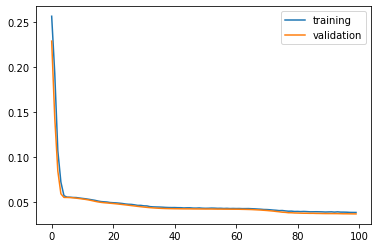

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)


50/50 [==============================] - 25s 505ms/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
7602  Inst  6770     1     h  7 2018-06-08 21:32:07   
2319  Inst  7105     1     h  7 2018-08-30 12:12:14   
7694  Inst  7037     1     h  7 2018-08-08 03:44:14   
3083  Inst  6675     1     h  7 2018-05-12 19:49:14   
6936  Inst  6269     1     h  7 2017-10-04 05:03:29   

                                                   file  n_bunches  \
7602  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6770/...        636   
2319  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7105/...       2556   
7694  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7037/...       2556   
3083  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6675/...        540   
6936  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6269/...       1836   

      bunch_index  bunch_number  ts_length  chunk  
7602        614.0         437.0      65536     29  
2319       1920.0        1420.0      65536      9  
7694       1917.0        1417.0      65536     30  
3083        540.0         375.0      65536     12  
6936       2591.0        1372.0      65536     27

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 2s 414ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6709     1     h  7 2018-05-21 01:56:13   
1244  Inst  6984     1     h  7 2018-07-26 22:21:14   
5767  Inst  6858     1     h  7 2018-06-28 08:16:20   
7206  Inst  7264     1     h  7 2018-10-07 00:49:58   
7624  Inst  6709     1     h  7 2018-05-21 01:56:13   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...       2556   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6984/...        286   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6858/...       1227   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...        540   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
4808       1201.0         866.0      65536     18  
1244        529.0         131.0      65536      4  
5767        533.0         252.0      65536     22  
7206        650.0         466.0      65536     28  
7624       1201.0         866.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

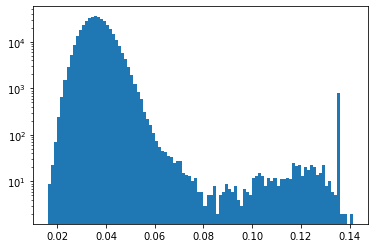

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

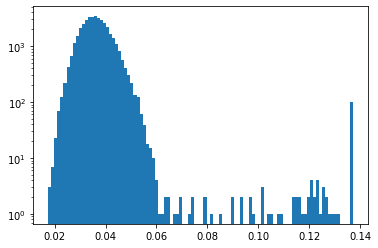

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.04329233350684866
type                                                         Inst
fill                                                         6770
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 21:32:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6770/...
n_bunches                                                     636
bunch_index                                                   614
bunch_number                                                  437
ts_length                                                   65536
chunk                                                          29
Name: 7602, dtype: object


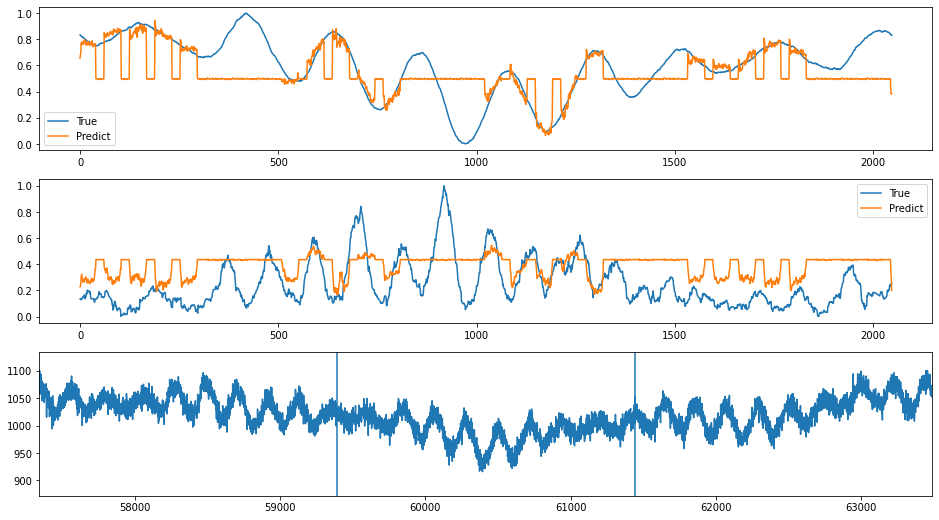

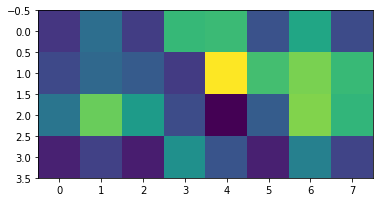

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 290702
Error: 0.016318096587797853
type                                                         Inst
fill                                                         7347
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 11:49:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7347/...
n_bunches                                                    2556
bunch_index                                                  1950
bunch_number                                                 1450
ts_length                                                   65536
chunk                                                          21
Name: 5607, dtype: object


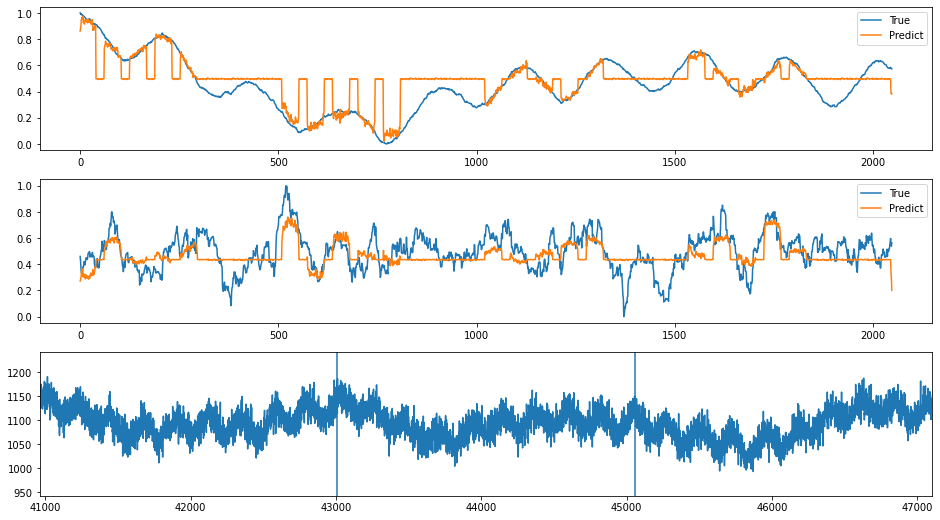

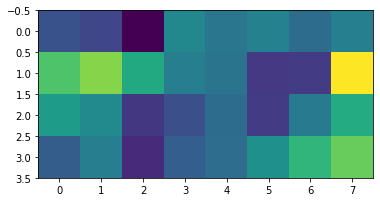

index: 364765
Error: 0.016643809587715094
type                                                         Inst
fill                                                         7444
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-15 08:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7444/...
n_bunches                                                     648
bunch_index                                                  3204
bunch_number                                                  601
ts_length                                                   65536
chunk                                                          18
Name: 4710, dtype: object


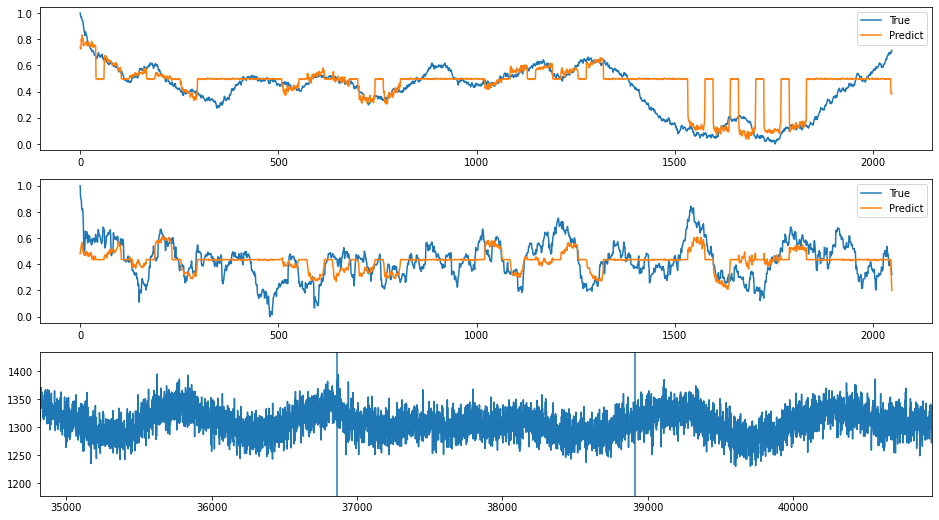

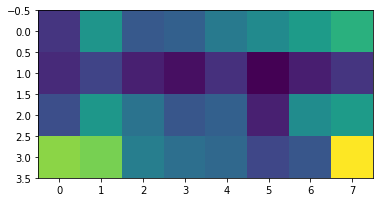

index: 242862
Error: 0.01680451409535264
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 17:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  1389
bunch_number                                                 1021
ts_length                                                   65536
chunk                                                          22
Name: 5804, dtype: object


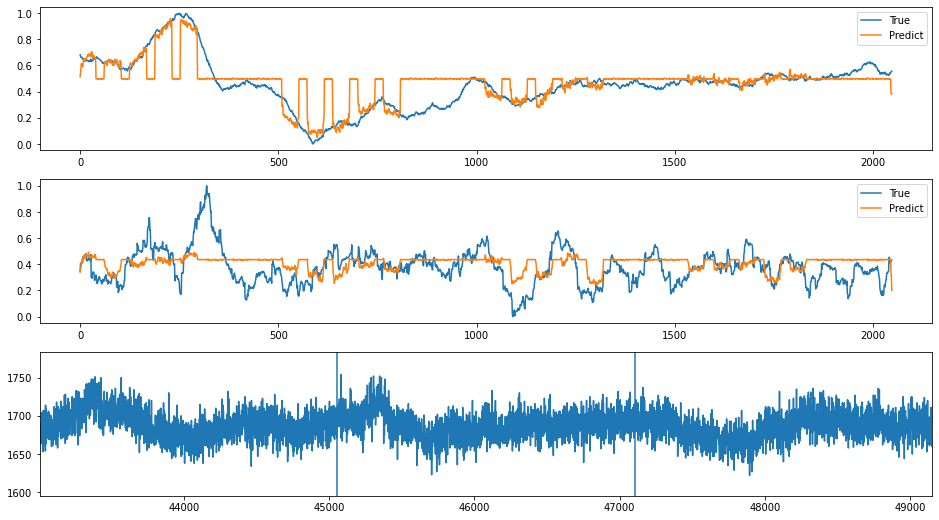

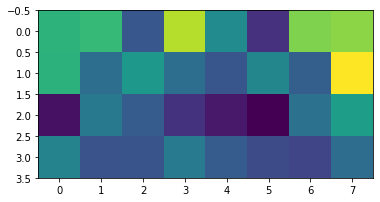

index: 380241
Error: 0.01690471519357791
type                                                         Inst
fill                                                         6694
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 14:51:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...
n_bunches                                                    2175
bunch_index                                                   211
bunch_number                                                  142
ts_length                                                   65536
chunk                                                           2
Name: 609, dtype: object


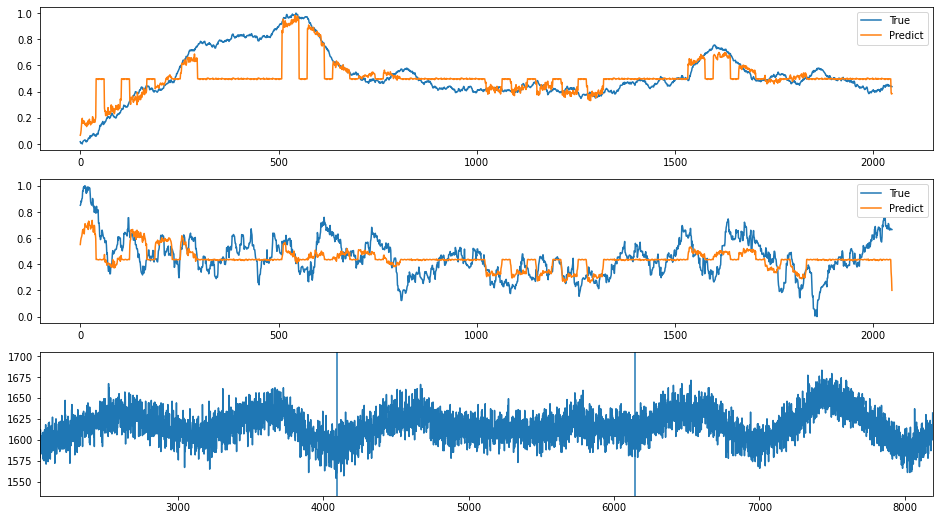

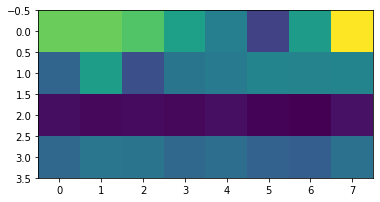

index: 185388
Error: 0.017105784042676236
type                                                         Inst
fill                                                         7362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 16:27:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7362/...
n_bunches                                                     157
bunch_index                                                   344
bunch_number                                                  109
ts_length                                                   65536
chunk                                                          22
Name: 5870, dtype: object


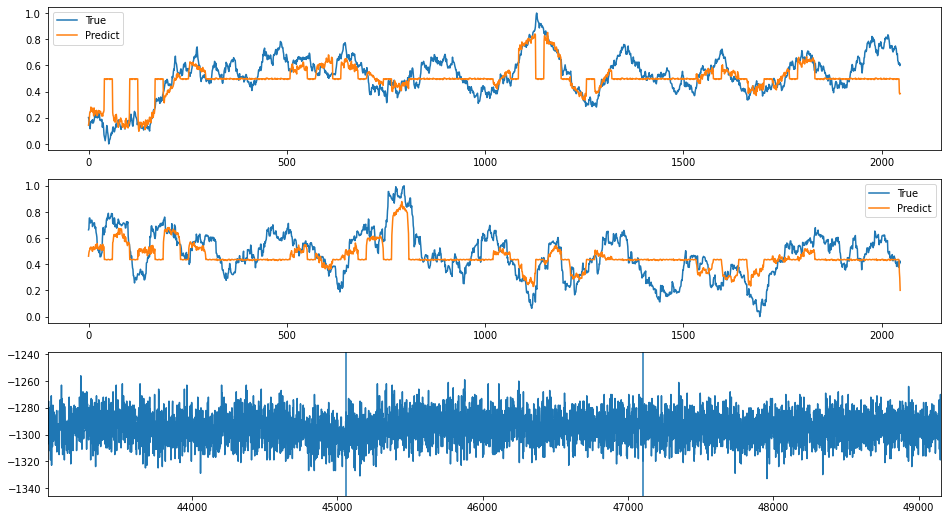

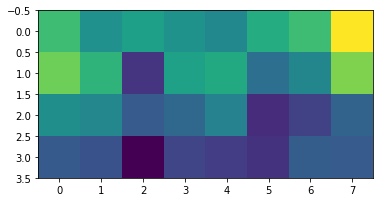

index: 198375
Error: 0.017167615157680484
type                                                         Inst
fill                                                         7362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 16:50:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7362/...
n_bunches                                                     157
bunch_index                                                   134
bunch_number                                                   21
ts_length                                                   65536
chunk                                                          10
Name: 2566, dtype: object


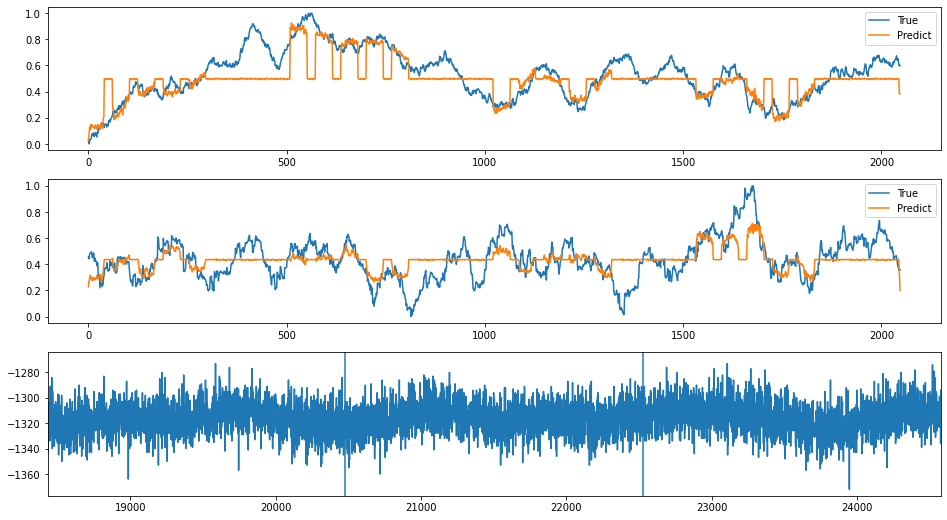

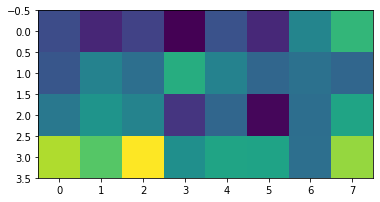

index: 224437
Error: 0.01722554244626605
type                                                         Inst
fill                                                         6713
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-23 06:27:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6713/...
n_bunches                                                     636
bunch_index                                                   415
bunch_number                                                  264
ts_length                                                   65536
chunk                                                           6
Name: 1612, dtype: object


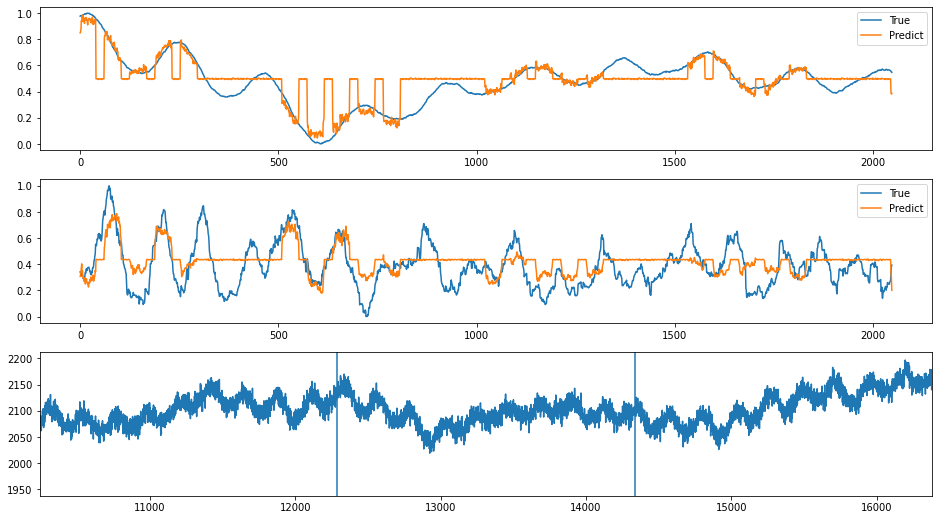

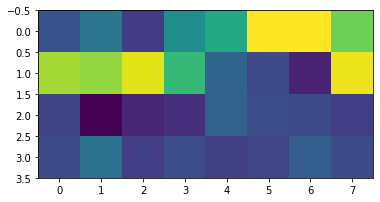

index: 143376
Error: 0.0172629807929476
type                                                         Inst
fill                                                         6382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 16:55:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6382/...
n_bunches                                                    1292
bunch_index                                                  2876
bunch_number                                                 1001
ts_length                                                   65536
chunk                                                          19
Name: 4941, dtype: object


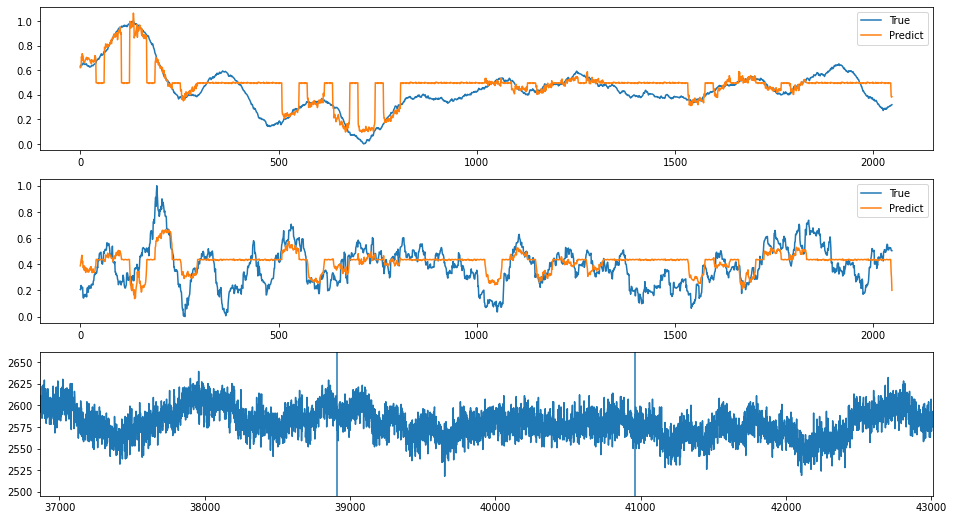

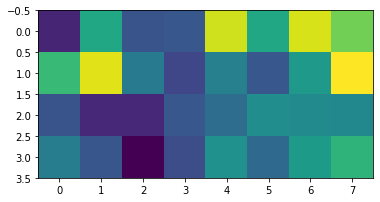

index: 383904
Error: 0.0175053749968813
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 02:25:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  2501
bunch_number                                                 1866
ts_length                                                   65536
chunk                                                          17
Name: 4593, dtype: object


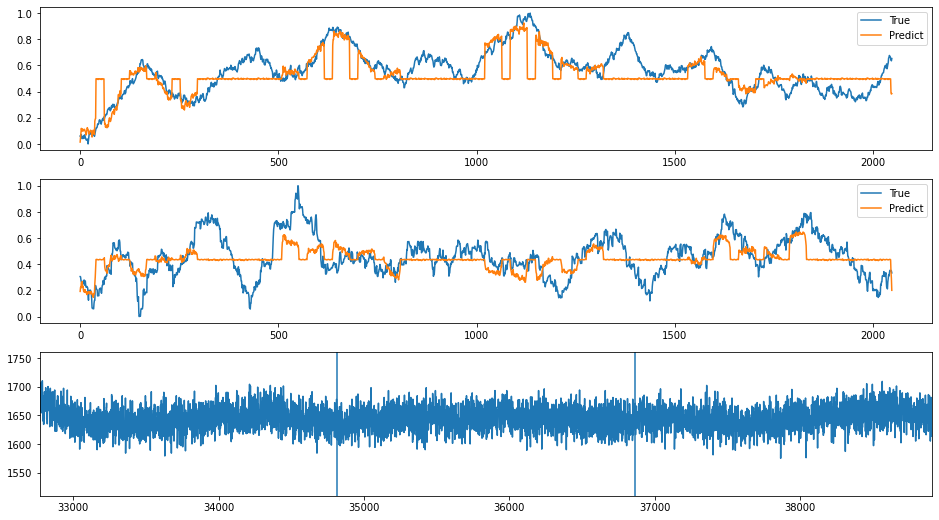

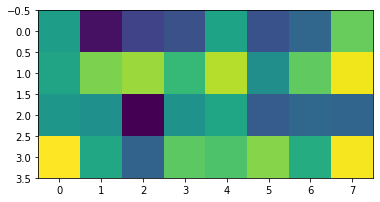

index: 32009
Error: 0.01757857745445118
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 17:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                  2897
bunch_number                                                 1594
ts_length                                                   65536
chunk                                                           6
Name: 1680, dtype: object


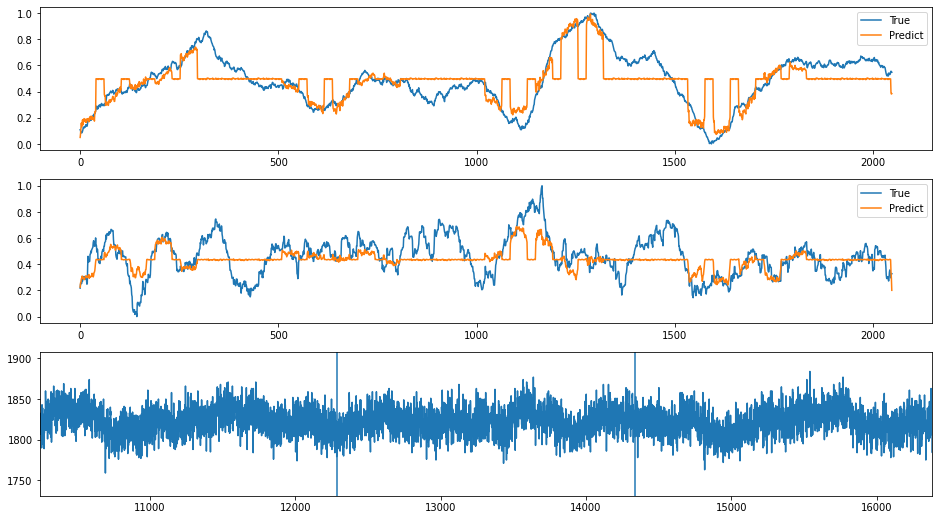

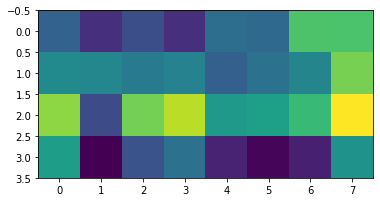

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 336990
Error: 0.1412275202475065
type                                                         Inst
fill                                                         6680
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-14 06:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6680/...
n_bunches                                                     264
bunch_index                                                   852
bunch_number                                                   84
ts_length                                                   65536
chunk                                                          28
Name: 7212, dtype: object


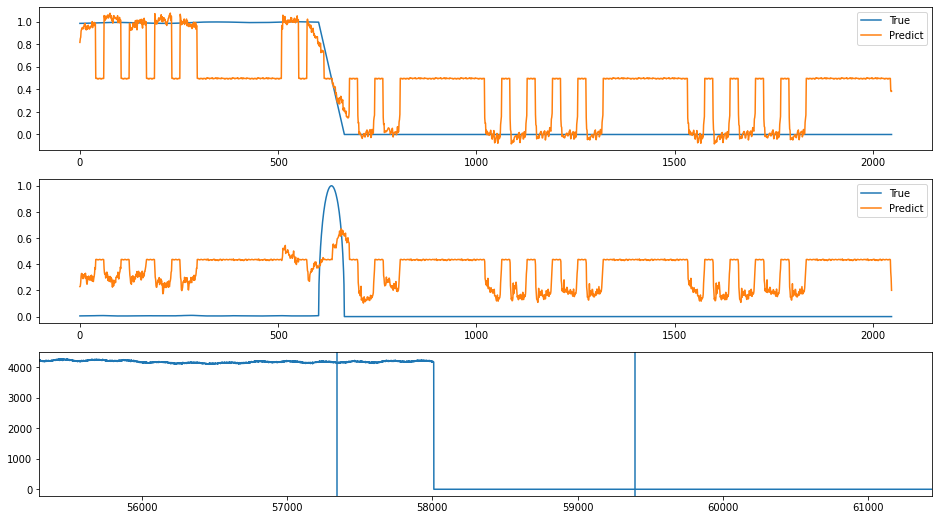

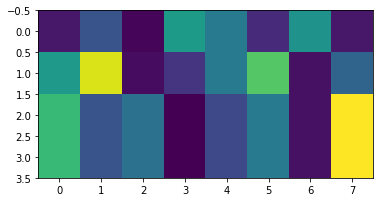

index: 106250
Error: 0.14106628287258588
type                                                         Inst
fill                                                         6680
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-14 06:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6680/...
n_bunches                                                     264
bunch_index                                                   159
bunch_number                                                   13
ts_length                                                   65536
chunk                                                          28
Name: 7369, dtype: object


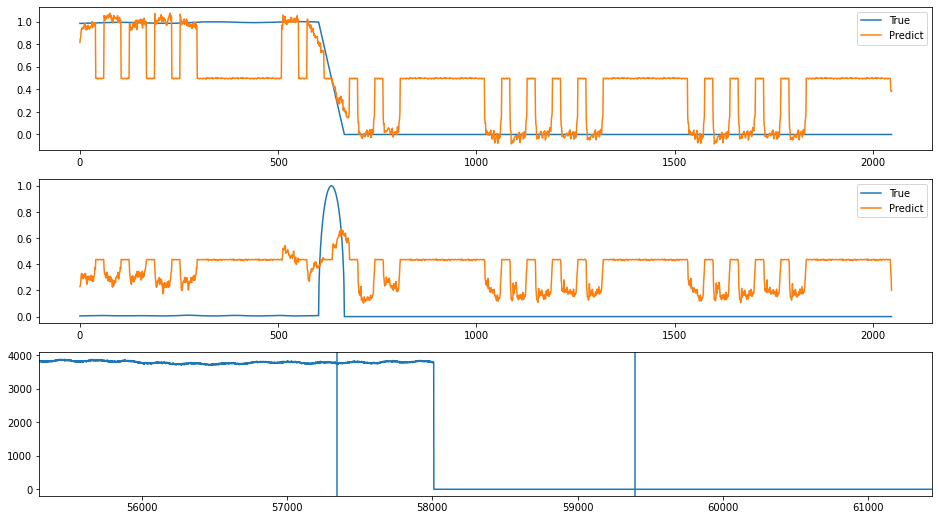

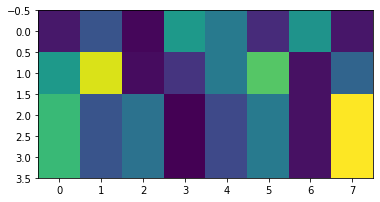

index: 76146
Error: 0.13817004279031767
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                   454
bunch_number                                                   54
ts_length                                                   65536
chunk                                                          10
Name: 2704, dtype: object


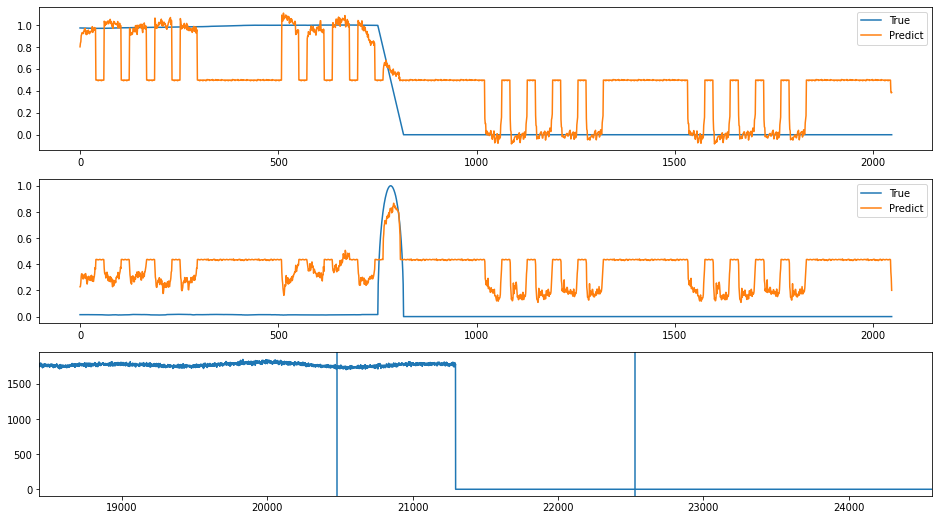

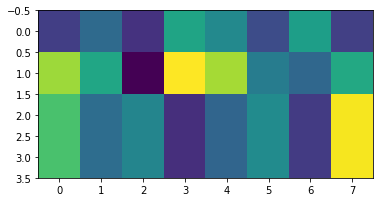

index: 43709
Error: 0.1379227458711673
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                  1792
bunch_number                                                  200
ts_length                                                   65536
chunk                                                          10
Name: 2696, dtype: object


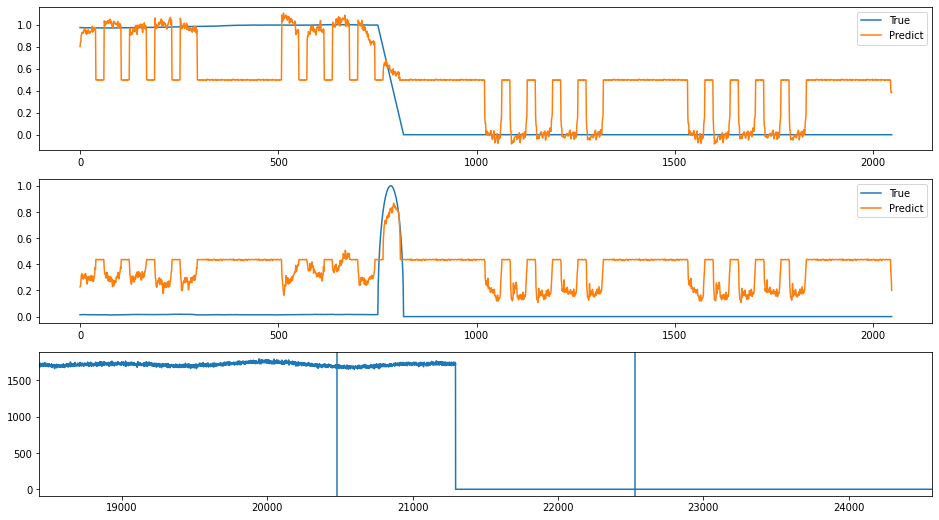

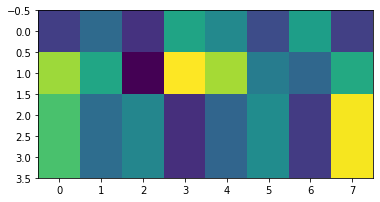

index: 201519
Error: 0.13740038961967665
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     652
bunch_index                                                  1140
bunch_number                                                  612
ts_length                                                   65536
chunk                                                          27
Name: 7166, dtype: object


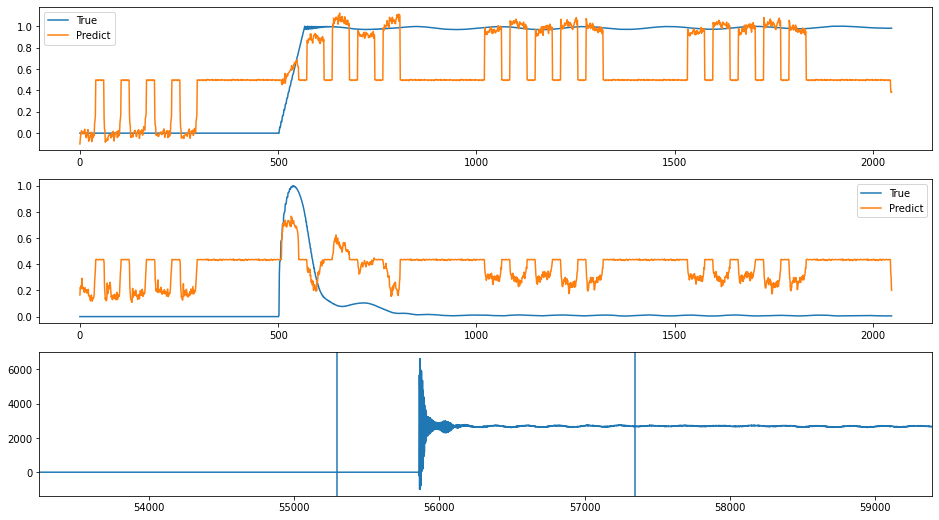

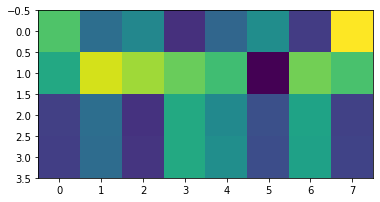

index: 26001
Error: 0.13691559639267376
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                   171
bunch_number                                                   76
ts_length                                                   65536
chunk                                                           4
Name: 1135, dtype: object


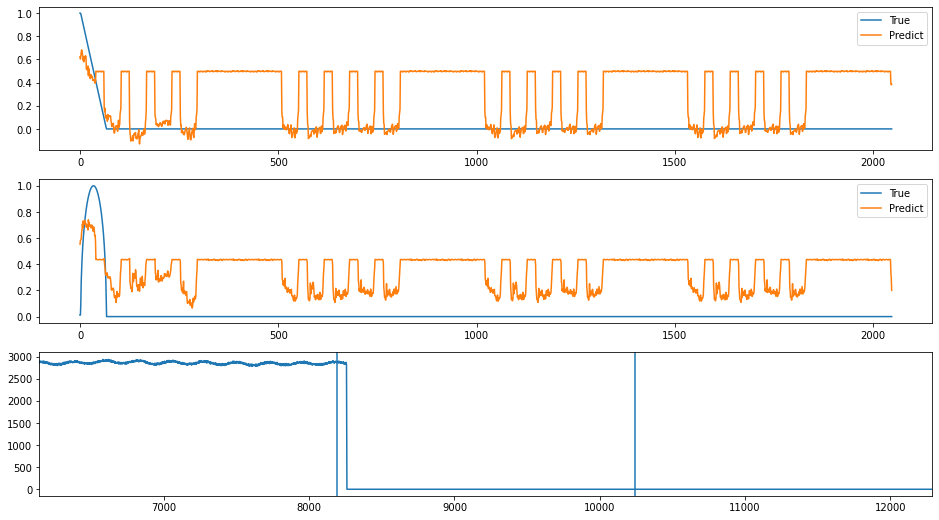

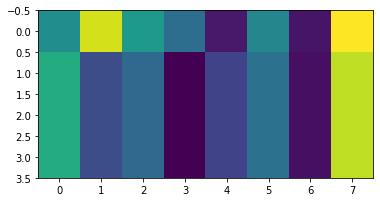

index: 387274
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:11:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     524
bunch_index                                                   877
bunch_number                                                  461
ts_length                                                   65536
chunk                                                           0
Name: 175, dtype: object


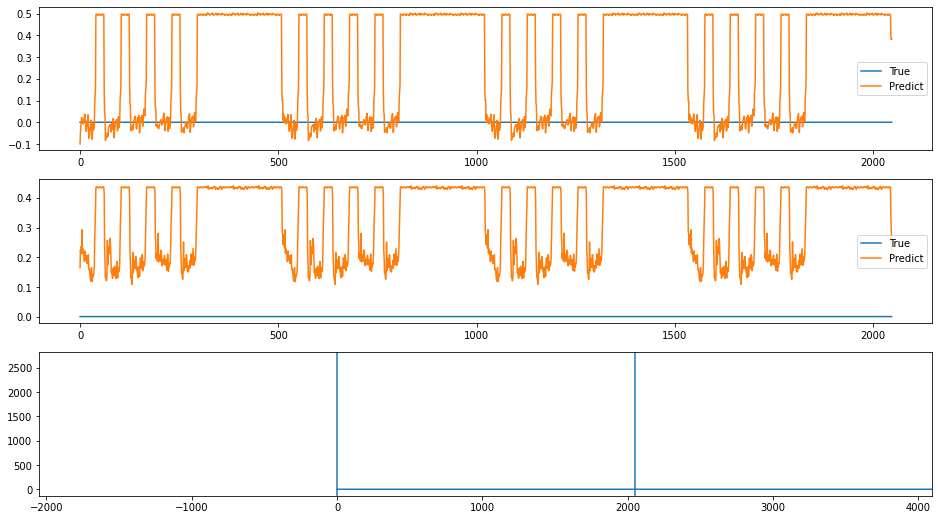

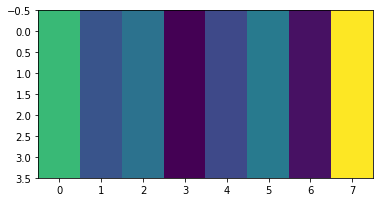

index: 68694
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7023
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:05:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7023/...
n_bunches                                                     108
bunch_index                                                   125
bunch_number                                                   69
ts_length                                                   65536
chunk                                                          14
Name: 3655, dtype: object


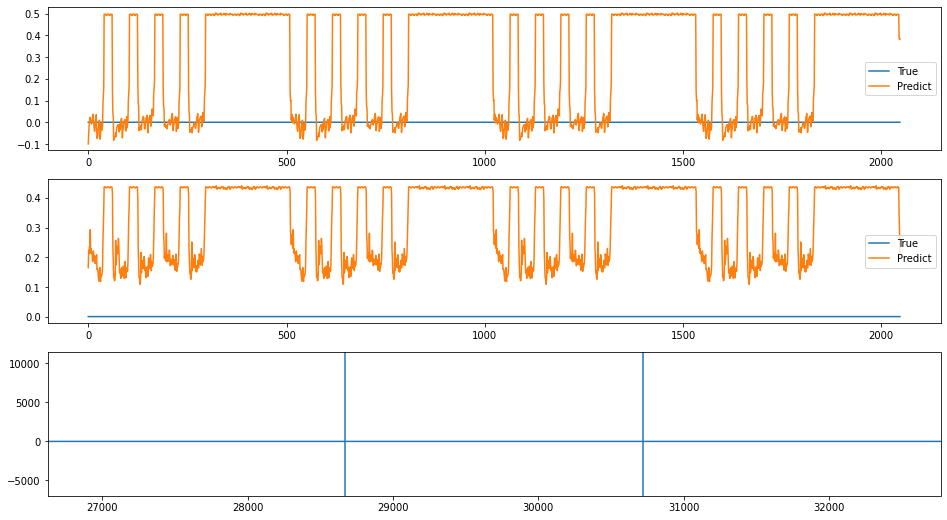

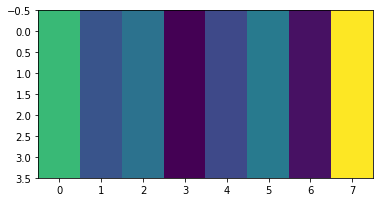

index: 30506
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                   171
bunch_number                                                   76
ts_length                                                   65536
chunk                                                           8
Name: 2159, dtype: object


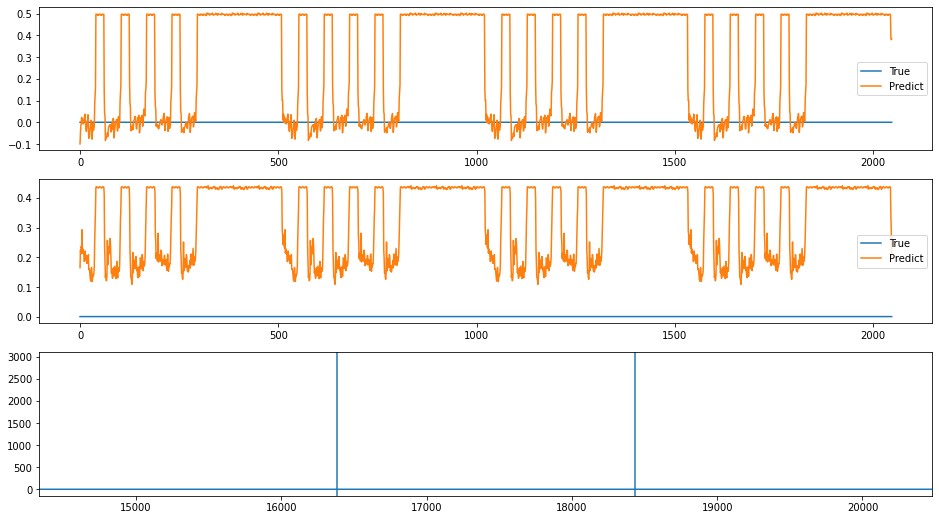

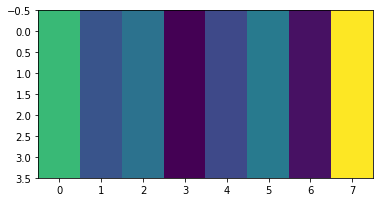

index: 30482
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                   171
bunch_number                                                   76
ts_length                                                   65536
chunk                                                           9
Name: 2415, dtype: object


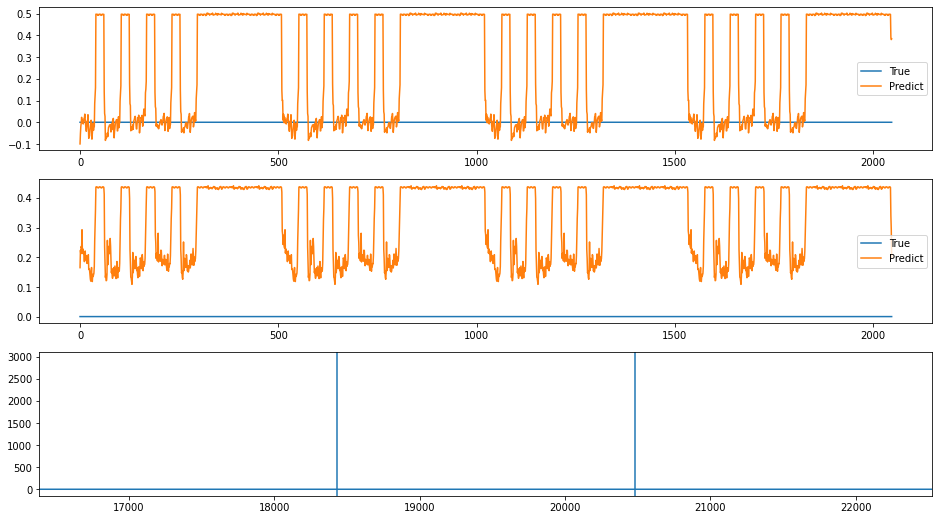

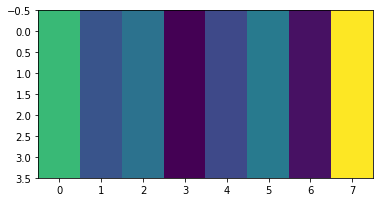

index: 346906
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7477
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-26 22:22:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/...
n_bunches                                                     502
bunch_index                                                  2330
bunch_number                                                  494
ts_length                                                   65536
chunk                                                           8
Name: 2205, dtype: object


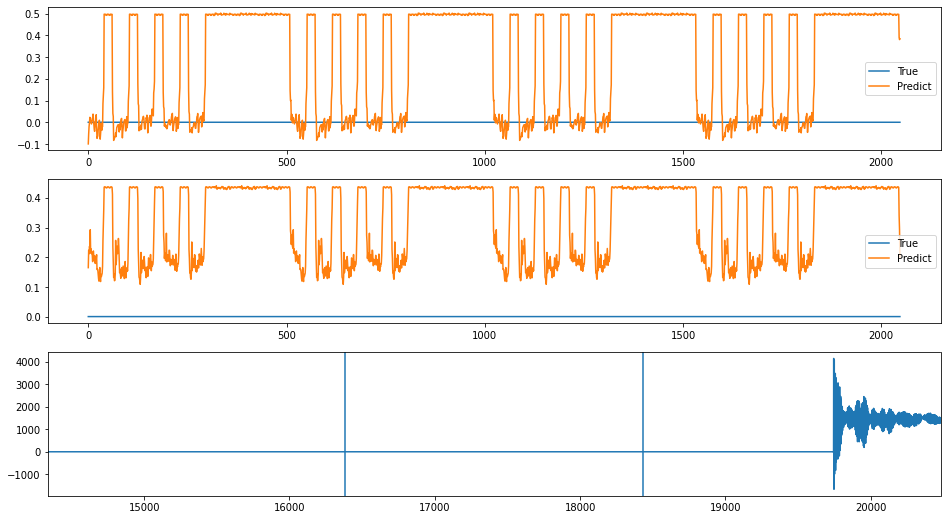

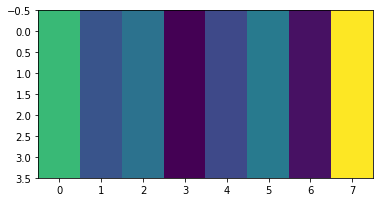

index: 99819
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 22:31:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                     428
bunch_index                                                   583
bunch_number                                                  307
ts_length                                                   65536
chunk                                                           1
Name: 266, dtype: object


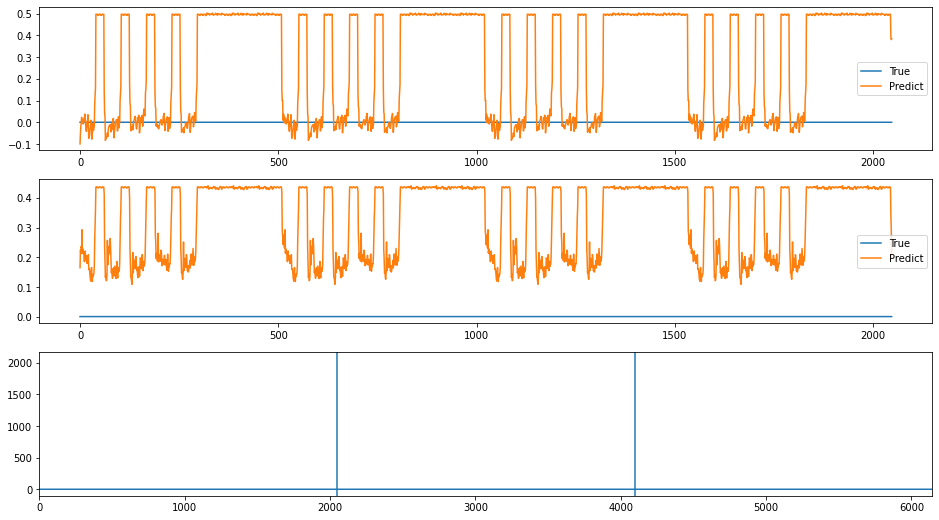

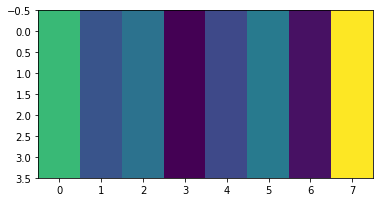

index: 113441
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6687
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 16:02:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6687/...
n_bunches                                                     636
bunch_index                                                   859
bunch_number                                                  607
ts_length                                                   65536
chunk                                                          10
Name: 2593, dtype: object


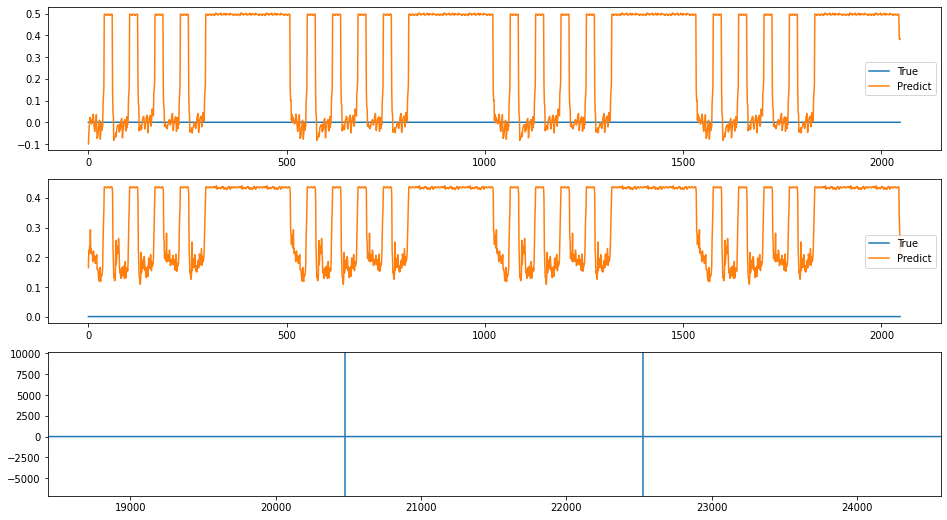

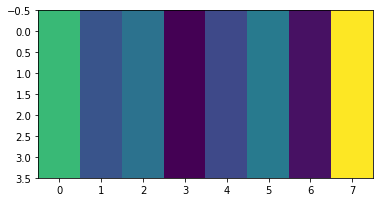

index: 68721
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2461
bunch_number                                                  520
ts_length                                                   65536
chunk                                                           7
Name: 1804, dtype: object


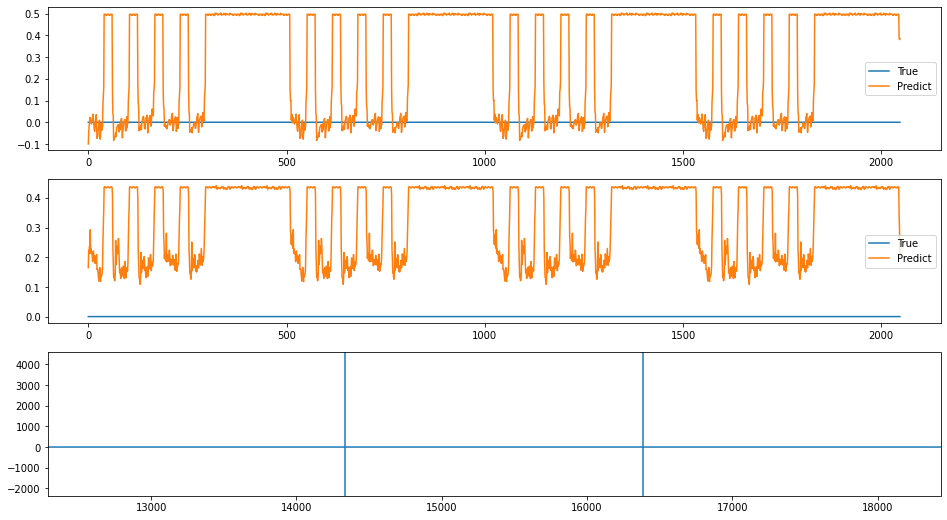

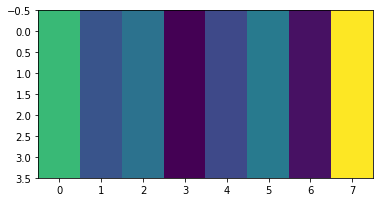

index: 326593
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7450
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 03:20:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7450/...
n_bunches                                                     312
bunch_index                                                  1516
bunch_number                                                  280
ts_length                                                   65536
chunk                                                           8
Name: 2103, dtype: object


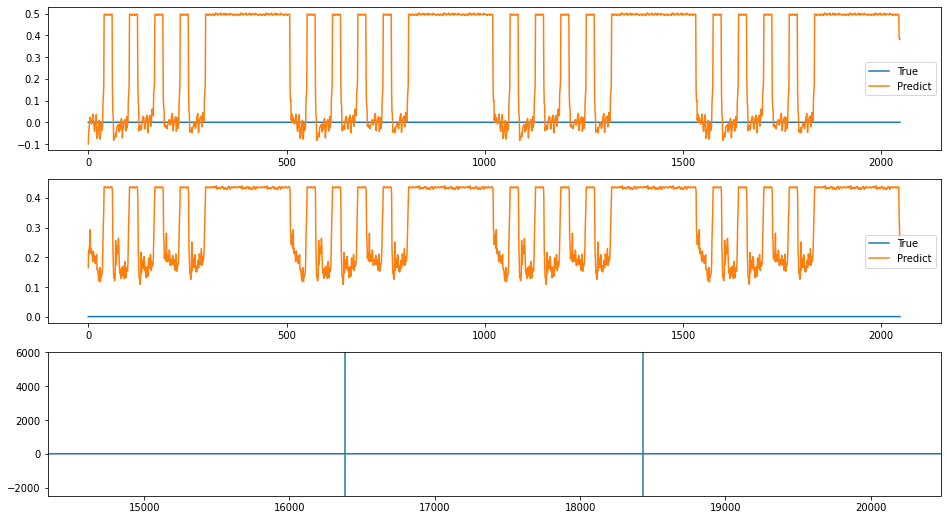

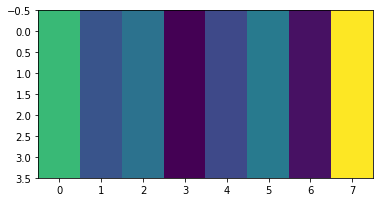

index: 113215
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6687
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 16:02:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6687/...
n_bunches                                                     636
bunch_index                                                   859
bunch_number                                                  607
ts_length                                                   65536
chunk                                                           2
Name: 545, dtype: object


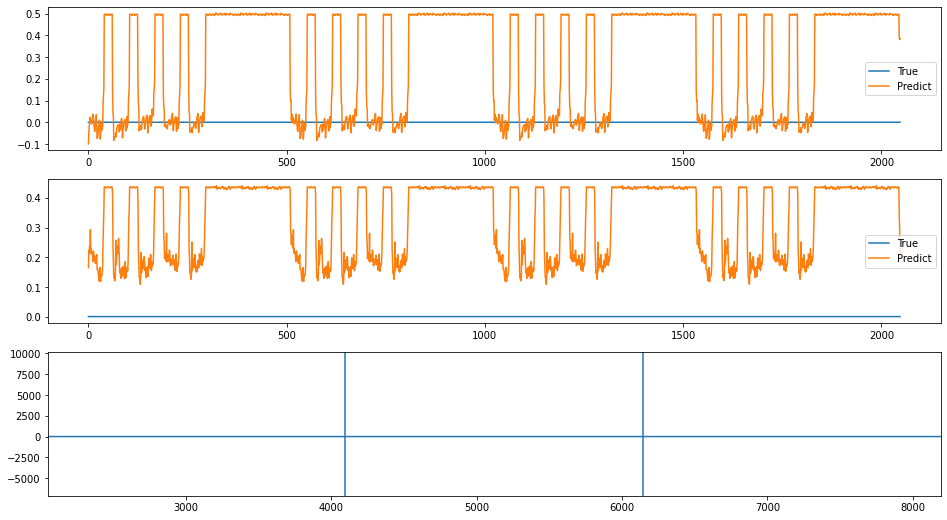

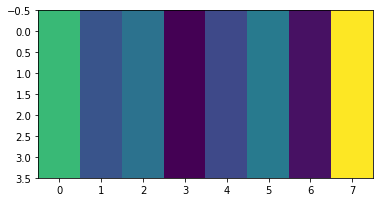

index: 68634
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7023
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:05:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7023/...
n_bunches                                                     108
bunch_index                                                   125
bunch_number                                                   69
ts_length                                                   65536
chunk                                                          10
Name: 2631, dtype: object


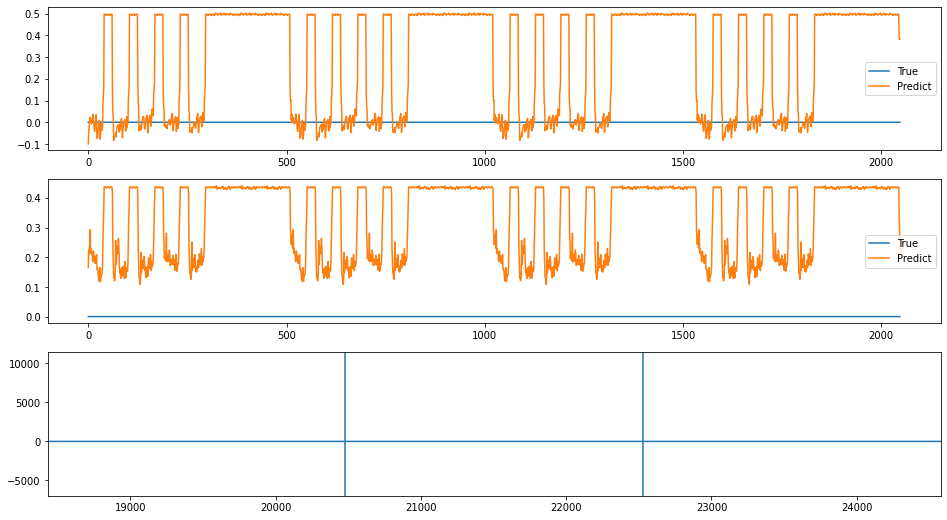

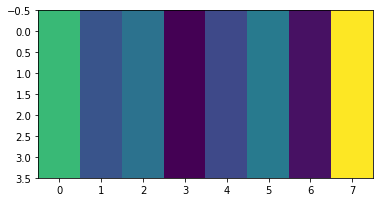

index: 68514
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           0
Name: 32, dtype: object


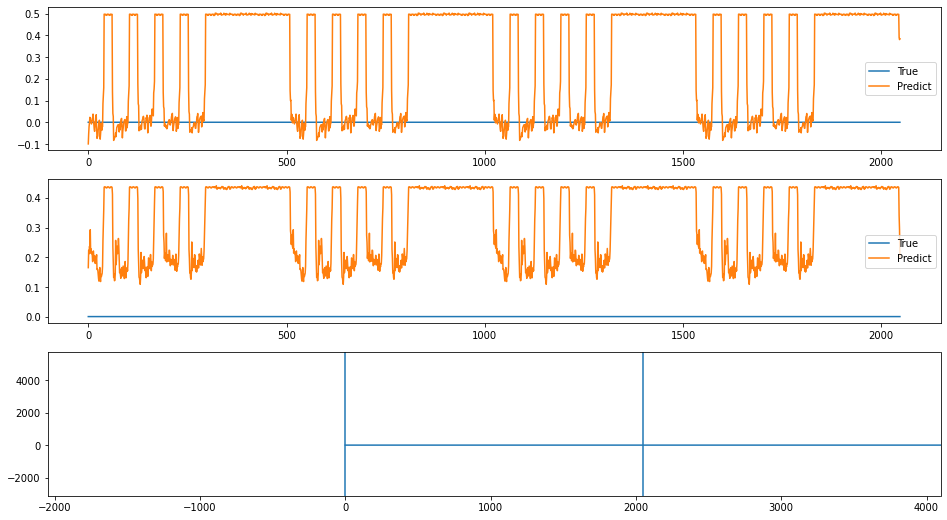

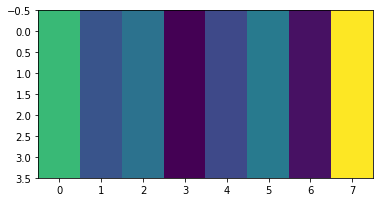

index: 69108
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2461
bunch_number                                                  520
ts_length                                                   65536
chunk                                                           6
Name: 1548, dtype: object


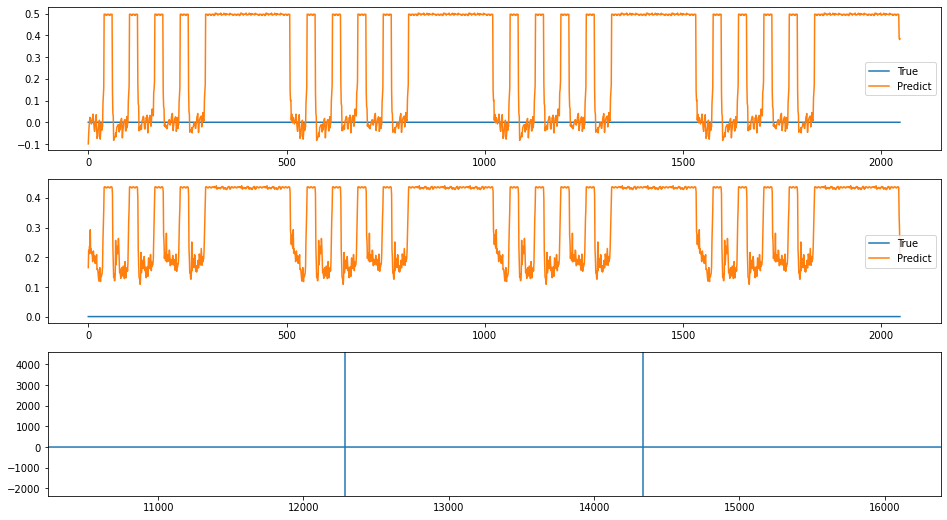

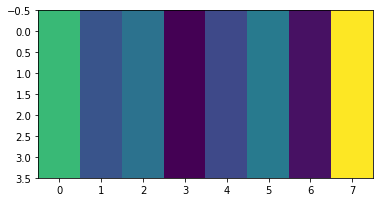

index: 106324
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7099
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-29 15:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7099/...
n_bunches                                                     396
bunch_index                                                   468
bunch_number                                                  329
ts_length                                                   65536
chunk                                                           1
Name: 454, dtype: object


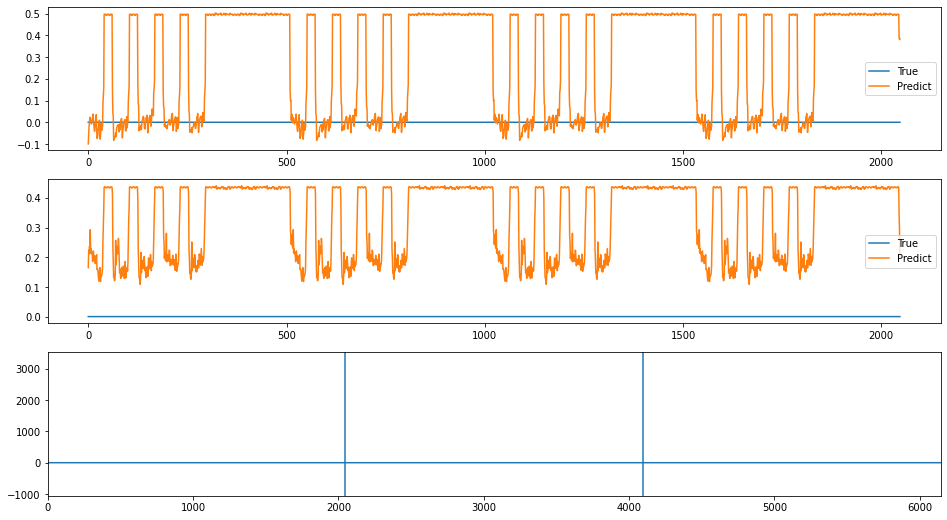

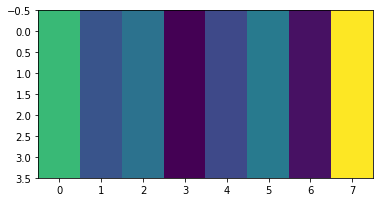

index: 326380
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7450
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 03:20:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7450/...
n_bunches                                                     312
bunch_index                                                  1516
bunch_number                                                  280
ts_length                                                   65536
chunk                                                           6
Name: 1591, dtype: object


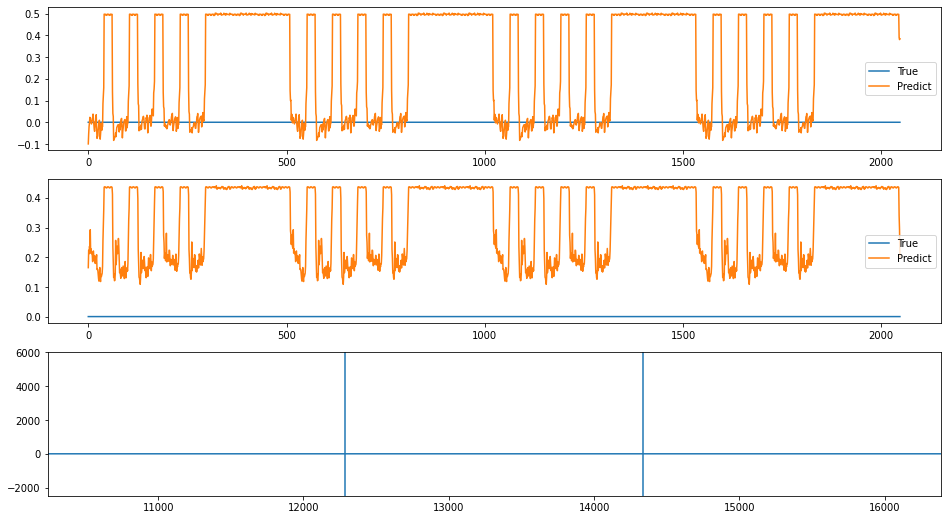

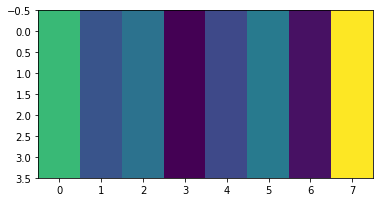

index: 242962
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:23:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1132
bunch_index                                                  2034
bunch_number                                                 1092
ts_length                                                   65536
chunk                                                           2
Name: 556, dtype: object


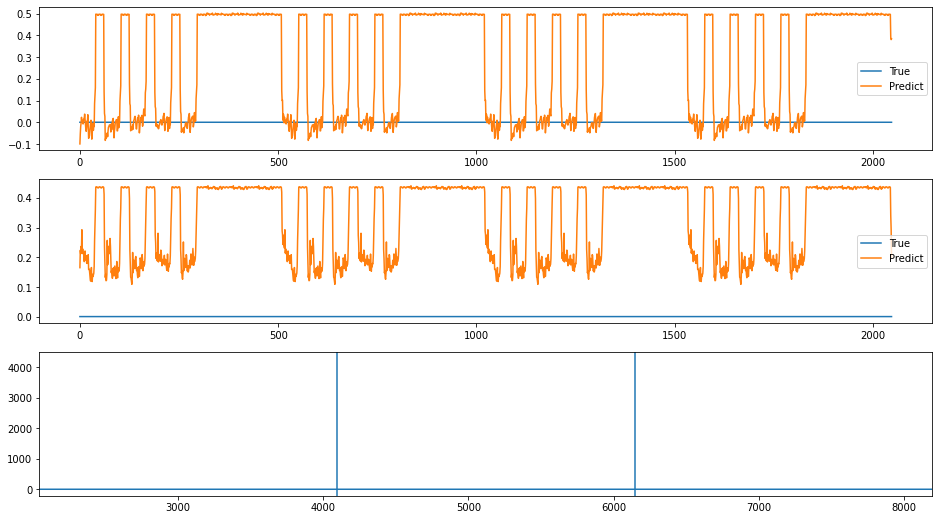

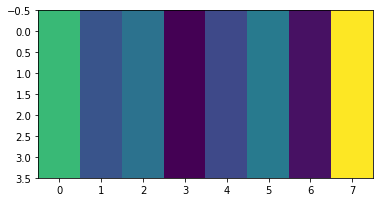

index: 68233
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7407
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-05 05:08:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7407/...
n_bunches                                                      64
bunch_index                                                  1388
bunch_number                                                   60
ts_length                                                   65536
chunk                                                           9
Name: 2518, dtype: object


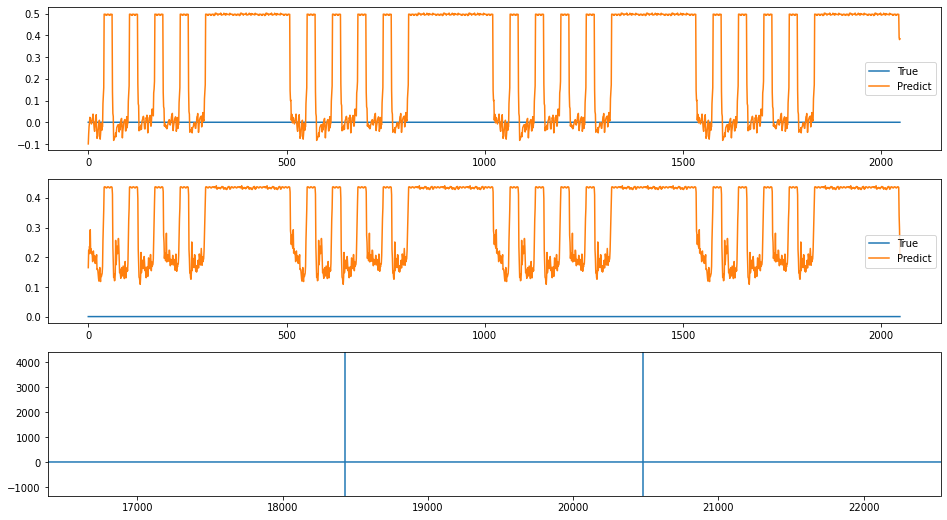

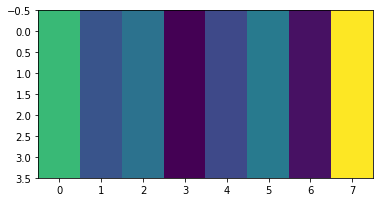

index: 68228
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7023
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:05:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7023/...
n_bunches                                                     108
bunch_index                                                   125
bunch_number                                                   69
ts_length                                                   65536
chunk                                                          13
Name: 3399, dtype: object


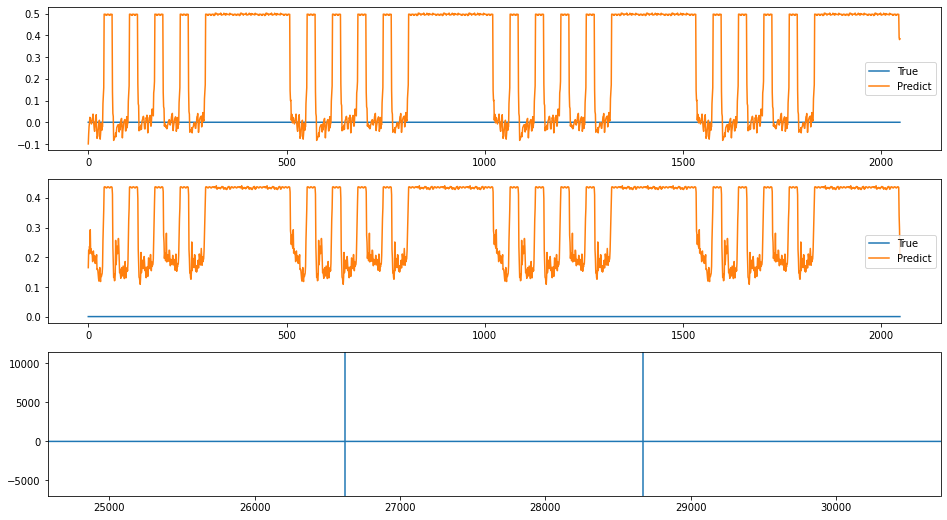

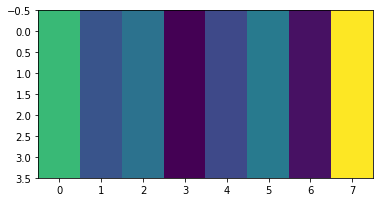

index: 68171
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           5
Name: 1312, dtype: object


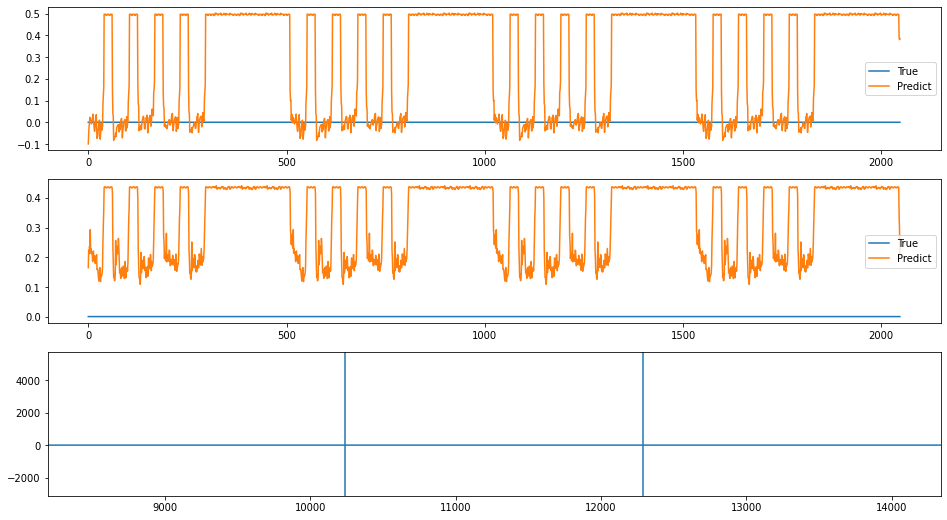

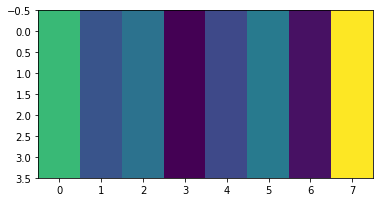

index: 68167
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   988
bunch_number                                                   93
ts_length                                                   65536
chunk                                                           9
Name: 2332, dtype: object


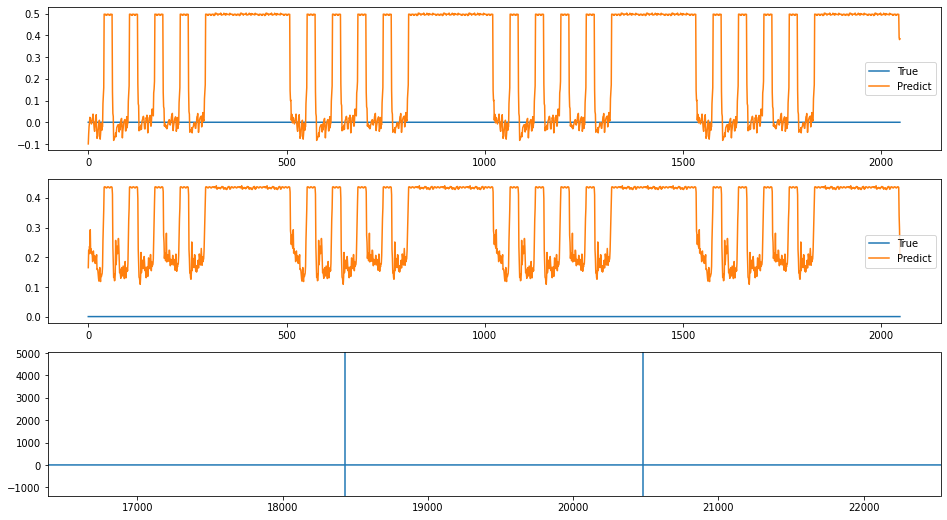

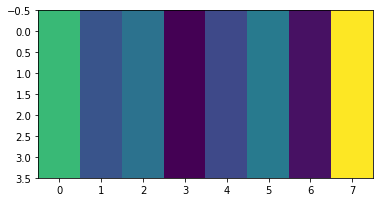

index: 68947
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   988
bunch_number                                                   93
ts_length                                                   65536
chunk                                                           7
Name: 1820, dtype: object


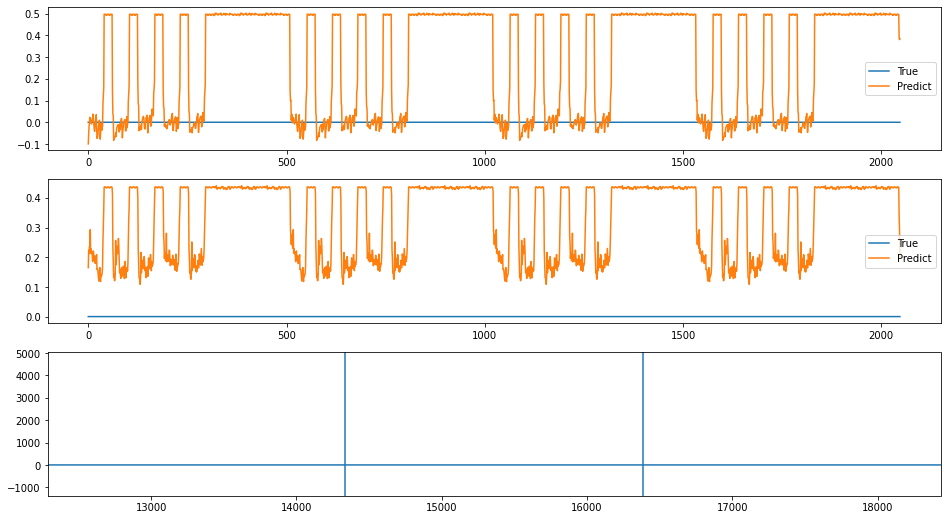

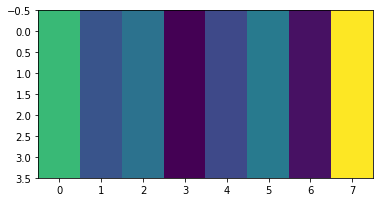

index: 69243
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           6
Name: 1568, dtype: object


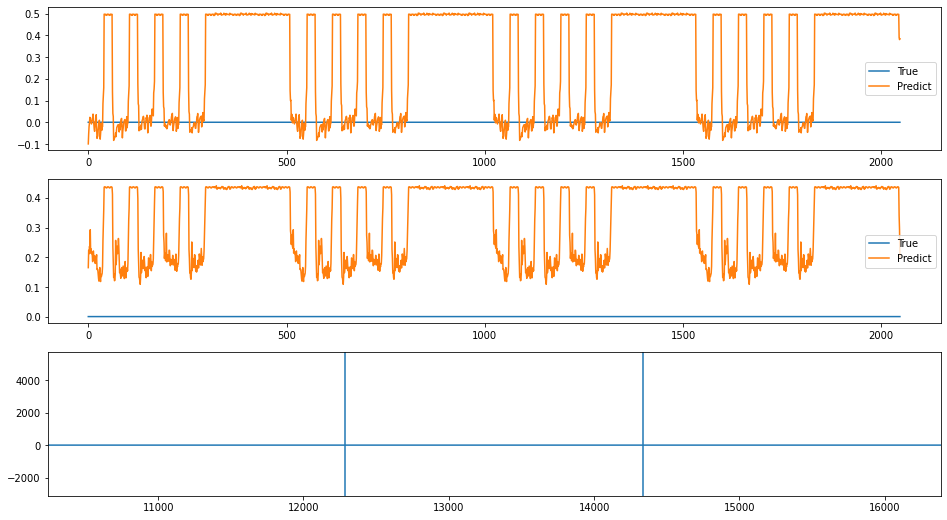

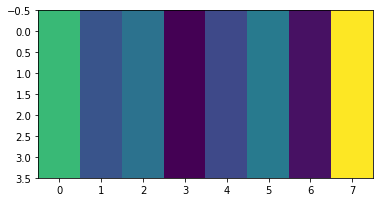

index: 69217
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   988
bunch_number                                                   93
ts_length                                                   65536
chunk                                                           2
Name: 540, dtype: object


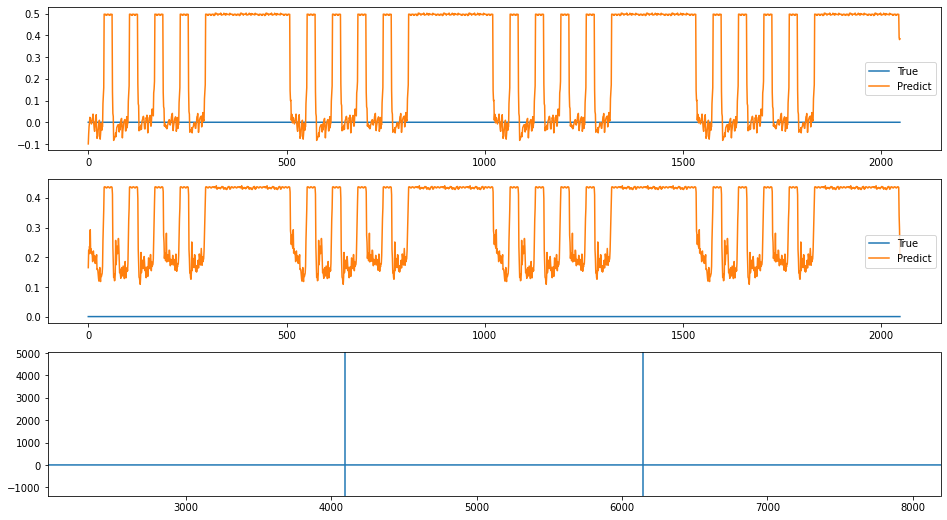

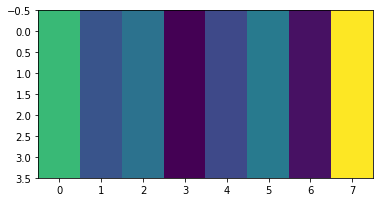

index: 68053
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           2
Name: 544, dtype: object


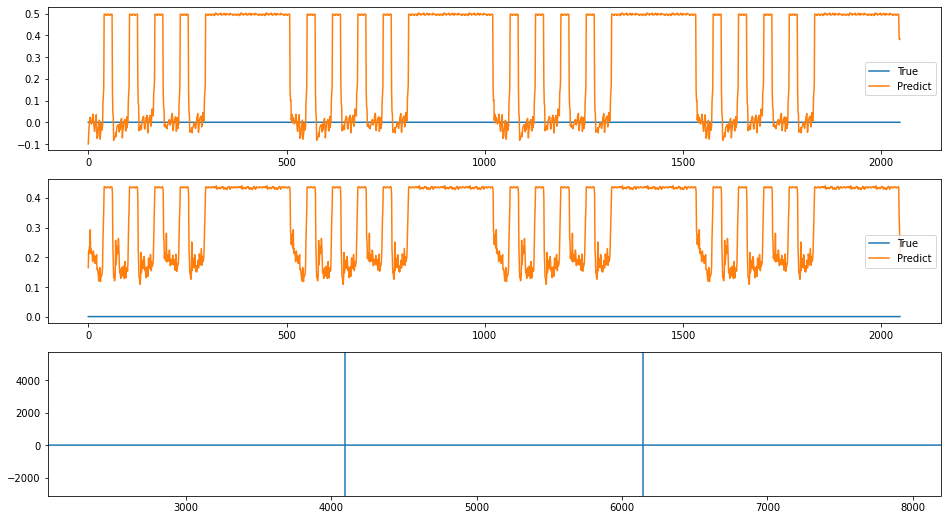

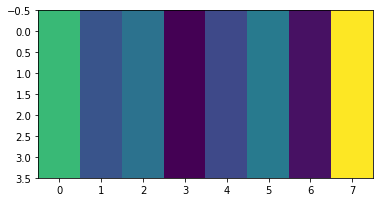

index: 70113
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2461
bunch_number                                                  520
ts_length                                                   65536
chunk                                                           8
Name: 2060, dtype: object


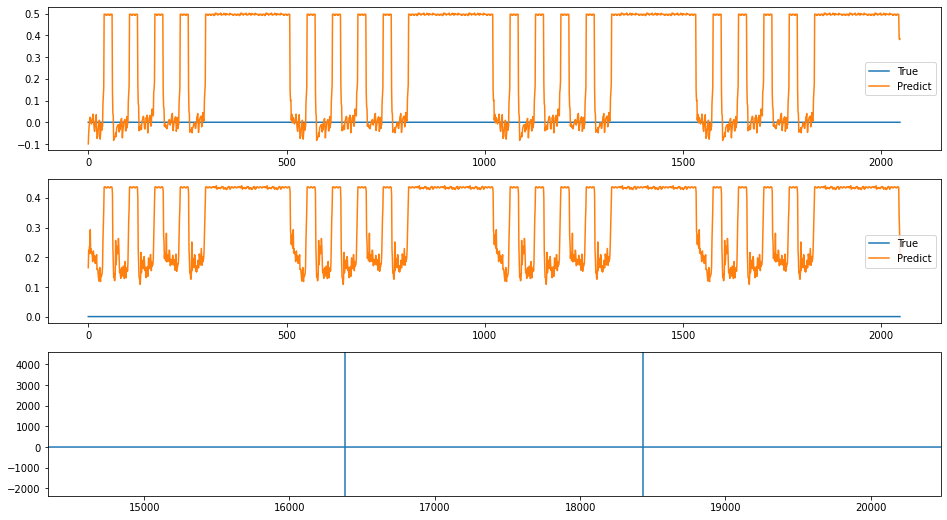

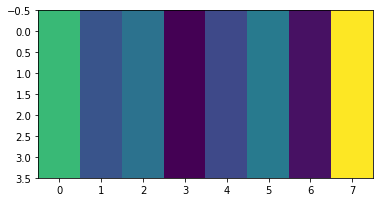

index: 311211
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7361
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 14:57:18
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7361/...
n_bunches                                                     132
bunch_index                                                  1645
bunch_number                                                   97
ts_length                                                   65536
chunk                                                           7
Name: 1952, dtype: object


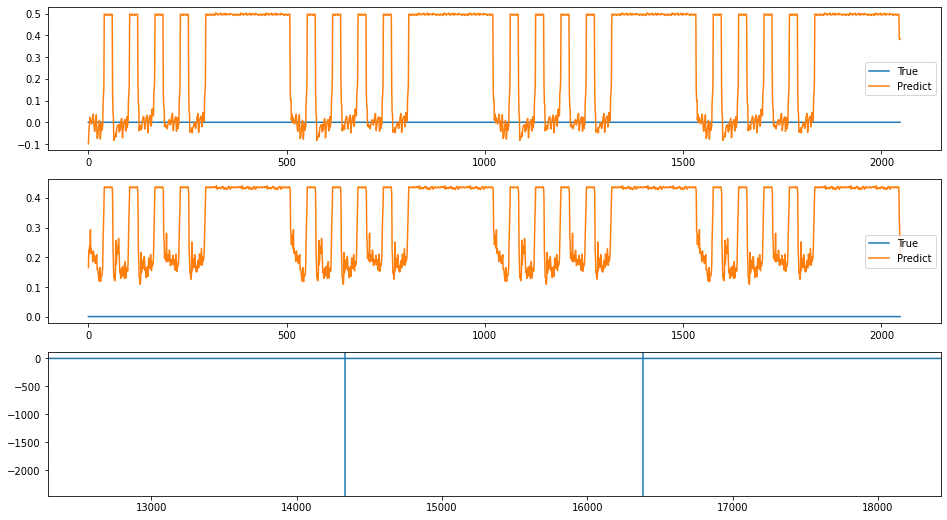

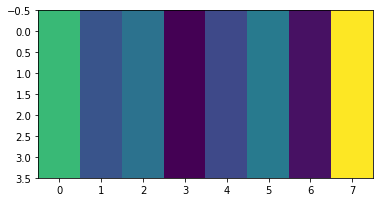

index: 311234
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 16:15:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7452/...
n_bunches                                                     408
bunch_index                                                  2157
bunch_number                                                  404
ts_length                                                   65536
chunk                                                           3
Name: 961, dtype: object


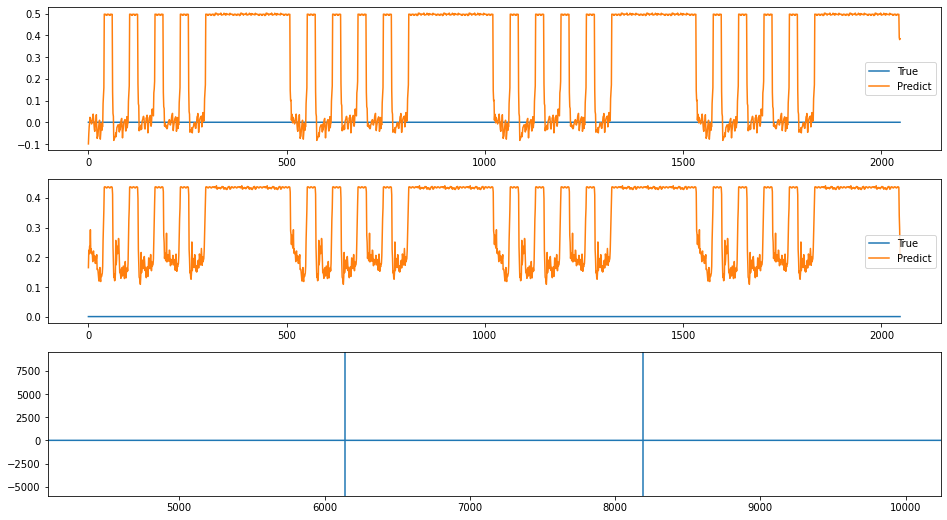

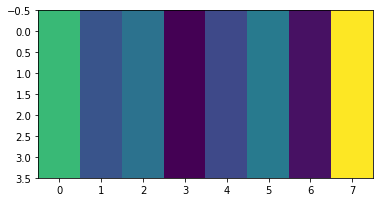

index: 157603
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6396
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 22:15:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6396/...
n_bunches                                                    1036
bunch_index                                                  2866
bunch_number                                                  995
ts_length                                                   65536
chunk                                                           1
Name: 341, dtype: object


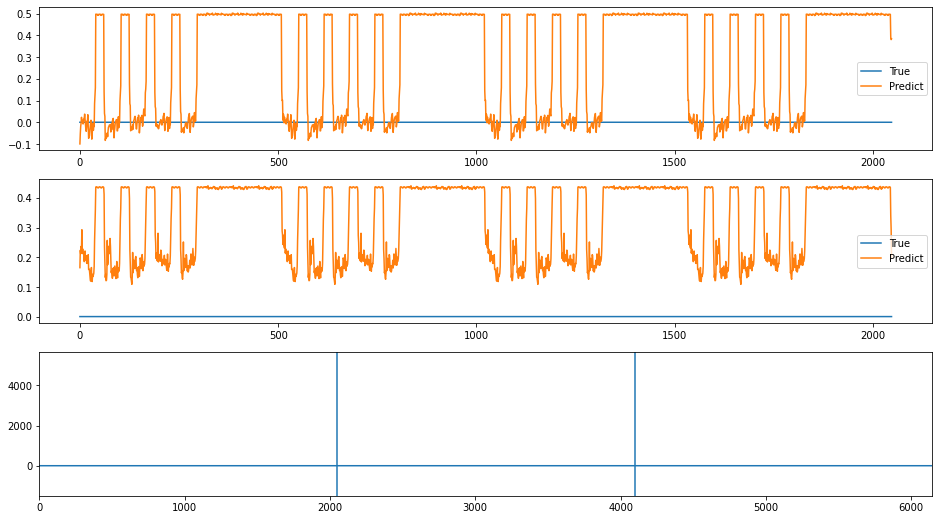

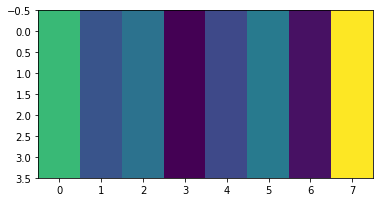

index: 47854
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6284
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 16:37:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6284/...
n_bunches                                                     428
bunch_index                                                   755
bunch_number                                                  414
ts_length                                                   65536
chunk                                                           4
Name: 1271, dtype: object


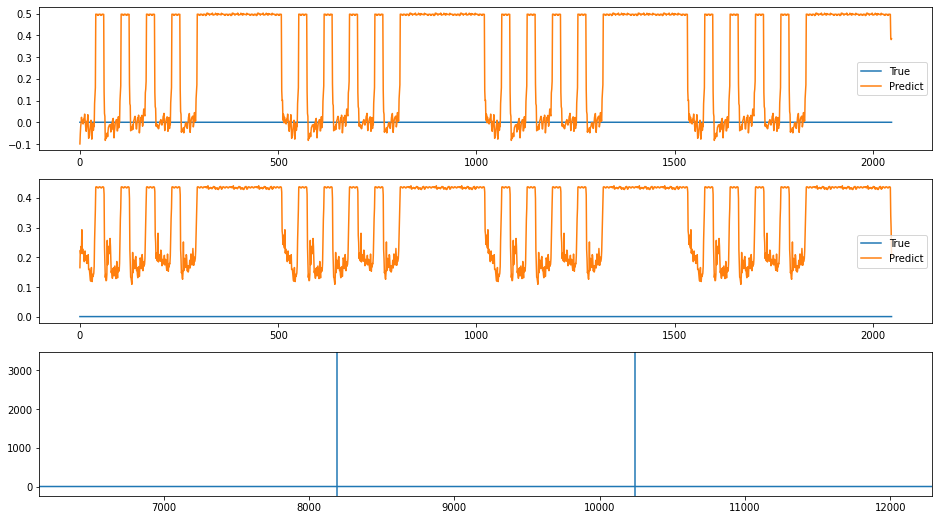

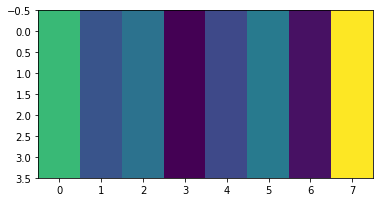

index: 327491
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7450
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 03:20:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7450/...
n_bunches                                                     312
bunch_index                                                  1516
bunch_number                                                  280
ts_length                                                   65536
chunk                                                          10
Name: 2615, dtype: object


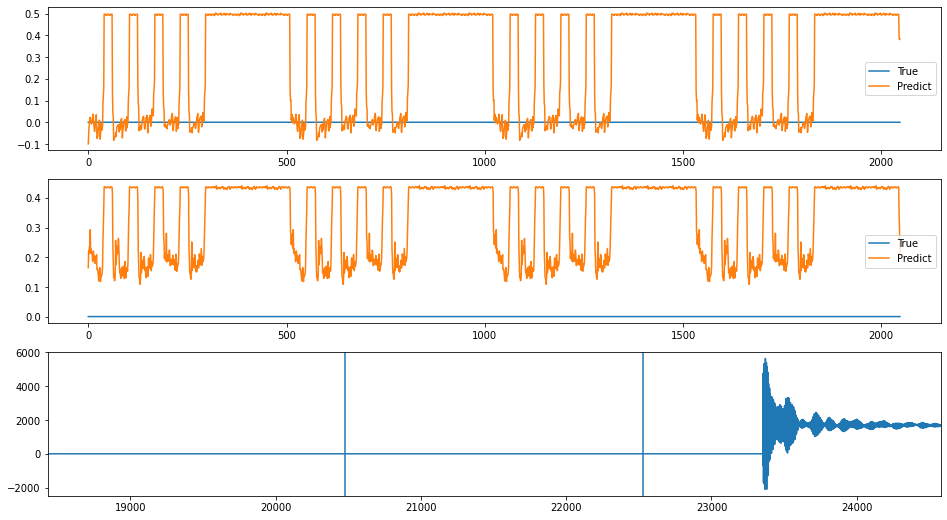

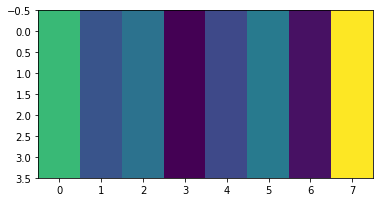

index: 157842
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6415
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-25 04:19:38
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6415/...
n_bunches                                                     908
bunch_index                                                  1547
bunch_number                                                  838
ts_length                                                   65536
chunk                                                           2
Name: 635, dtype: object


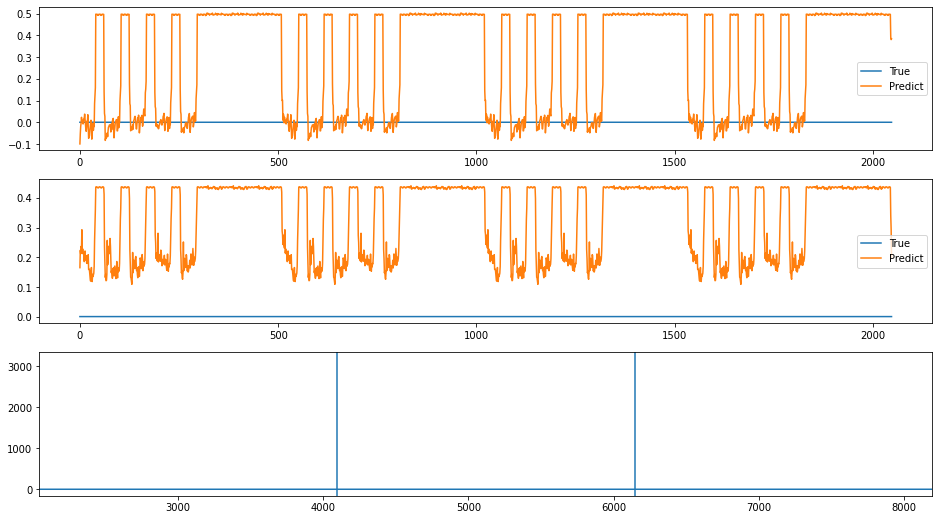

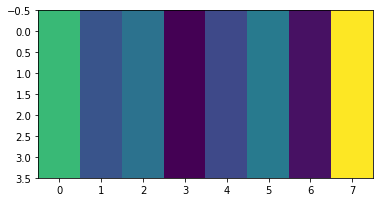

index: 69932
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   988
bunch_number                                                   93
ts_length                                                   65536
chunk                                                           5
Name: 1308, dtype: object


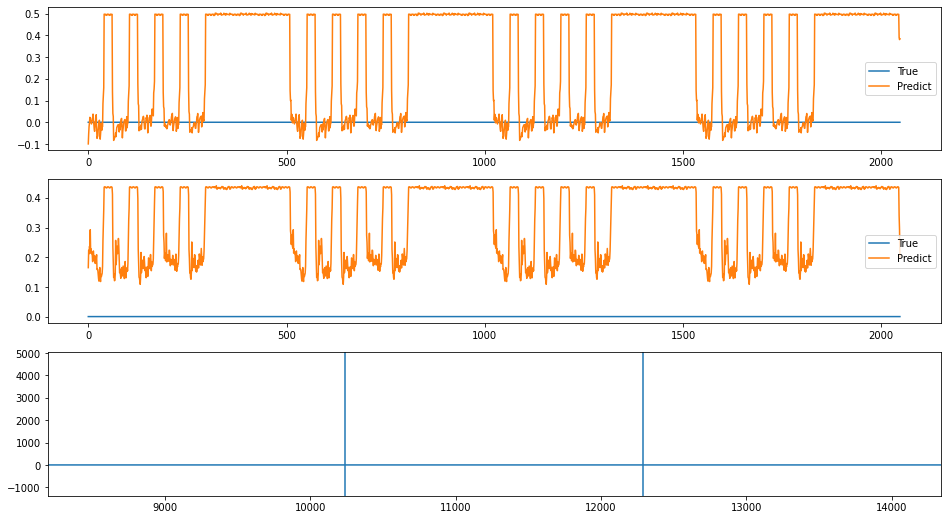

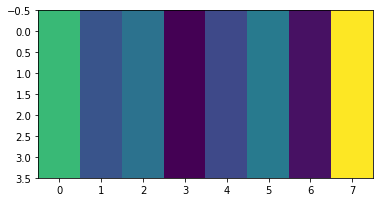

index: 69876
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           3
Name: 800, dtype: object


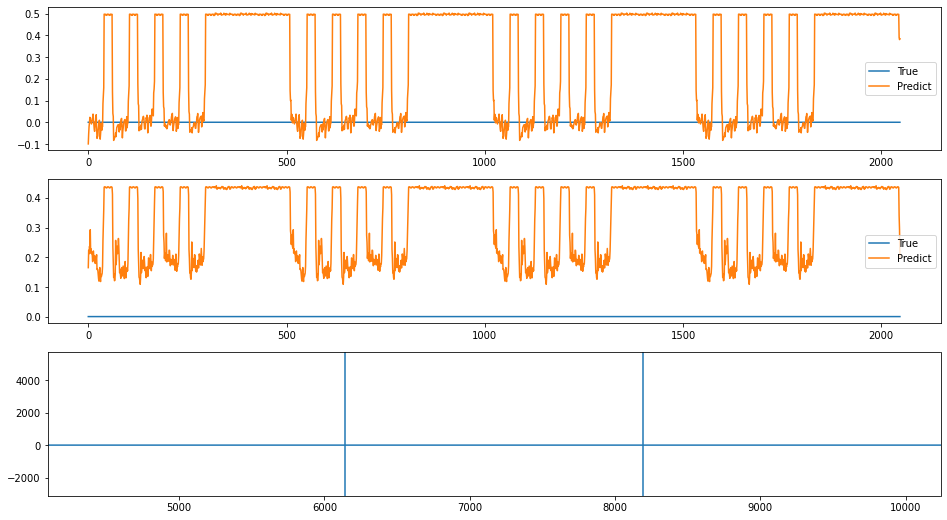

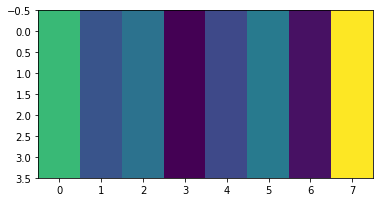

index: 311427
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-17 16:15:37
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7452/...
n_bunches                                                     408
bunch_index                                                  2157
bunch_number                                                  404
ts_length                                                   65536
chunk                                                           9
Name: 2497, dtype: object


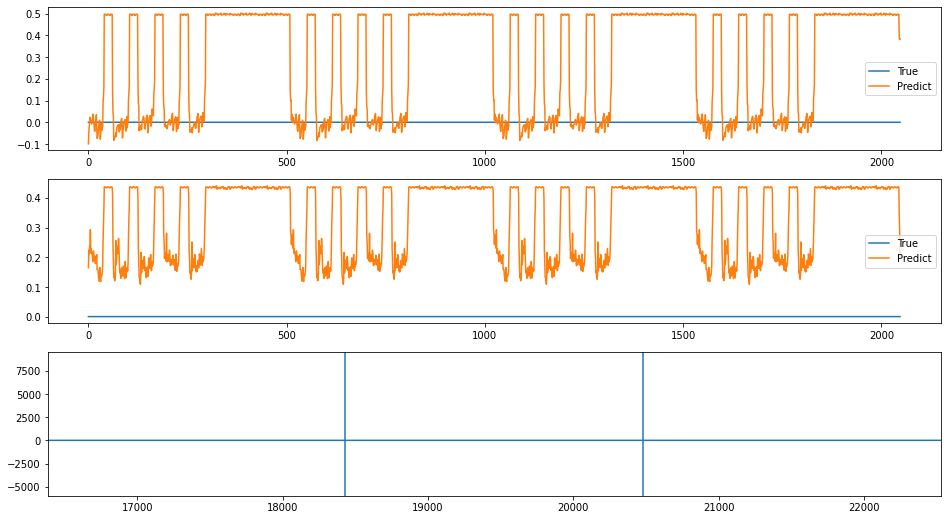

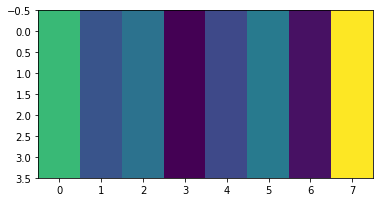

index: 350206
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7447
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 04:58:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7447/...
n_bunches                                                     372
bunch_index                                                  1977
bunch_number                                                  370
ts_length                                                   65536
chunk                                                           1
Name: 405, dtype: object


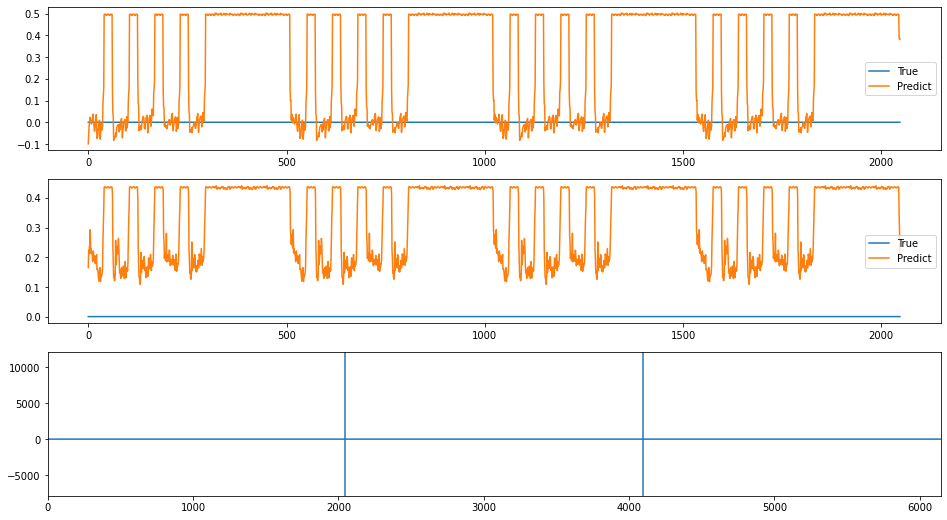

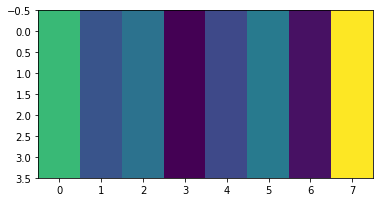

index: 157957
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7453
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 06:29:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7453/...
n_bunches                                                     312
bunch_index                                                  1654
bunch_number                                                  311
ts_length                                                   65536
chunk                                                           4
Name: 1223, dtype: object


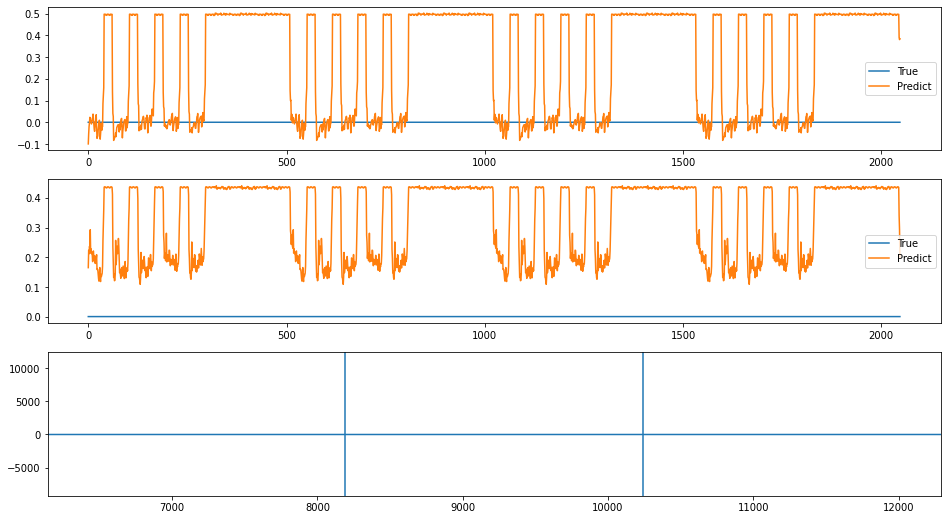

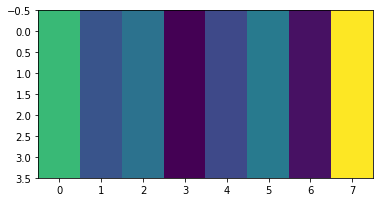

index: 69761
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7023
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:05:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7023/...
n_bunches                                                     108
bunch_index                                                   125
bunch_number                                                   69
ts_length                                                   65536
chunk                                                          11
Name: 2887, dtype: object


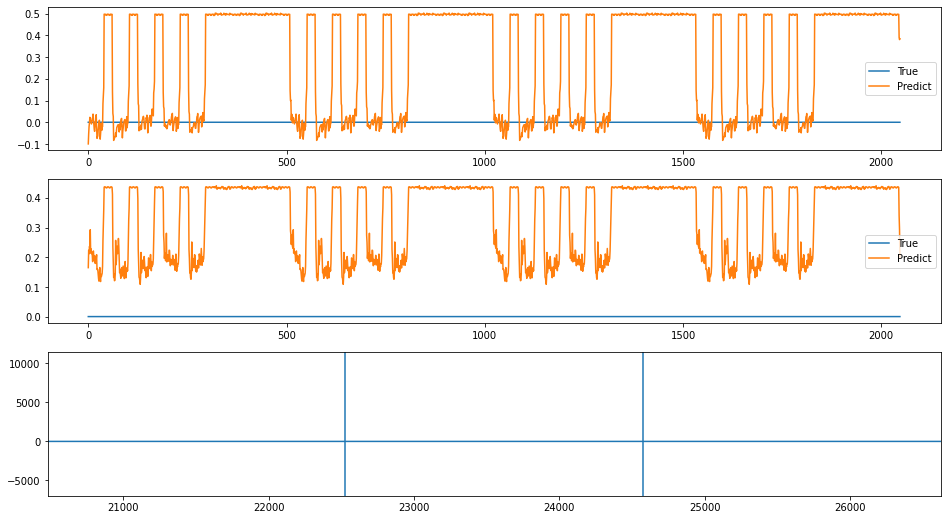

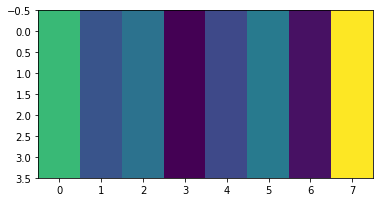

index: 69737
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7487
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-30 19:07:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...
n_bunches                                                     544
bunch_index                                                  2551
bunch_number                                                  543
ts_length                                                   65536
chunk                                                           7
Name: 1824, dtype: object


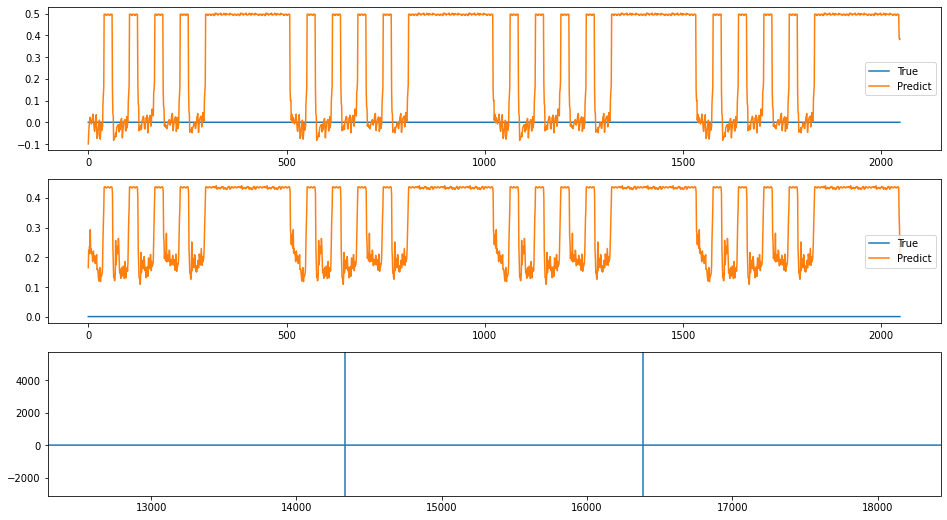

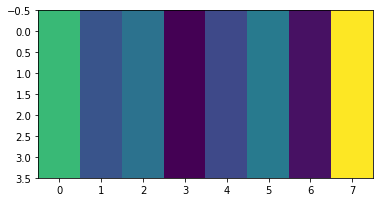

index: 278642
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 19:07:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                     204
bunch_index                                                   448
bunch_number                                                  166
ts_length                                                   65536
chunk                                                           0
Name: 110, dtype: object


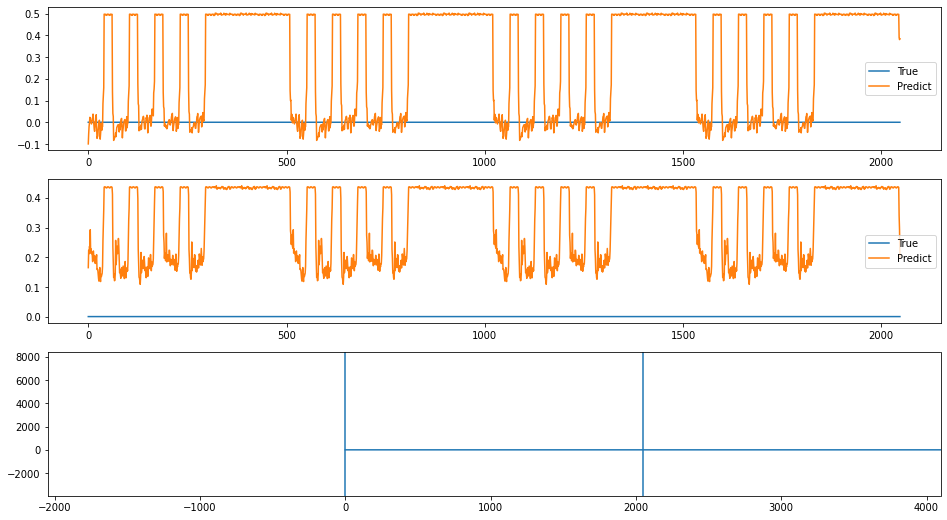

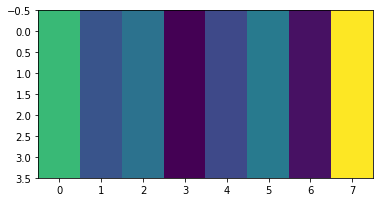

index: 158531
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7453
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 06:29:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7453/...
n_bunches                                                     312
bunch_index                                                  1654
bunch_number                                                  311
ts_length                                                   65536
chunk                                                           0
Name: 199, dtype: object


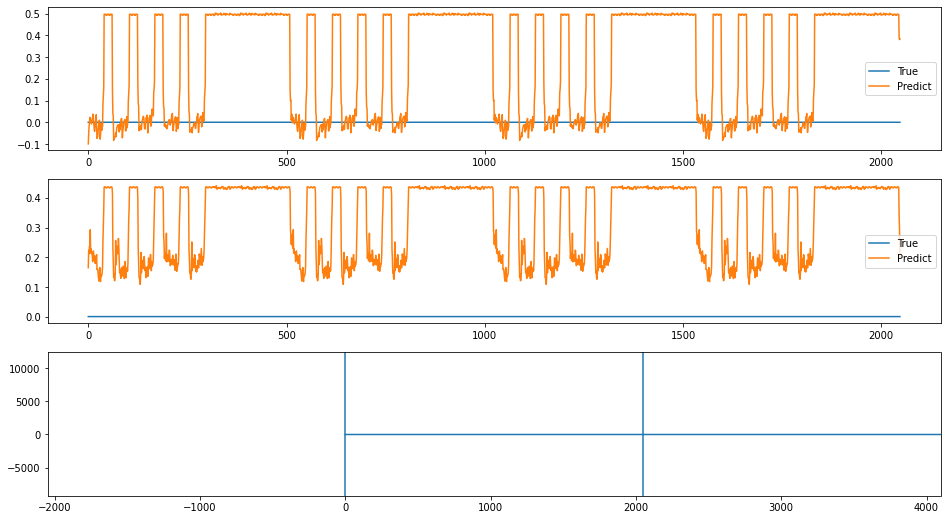

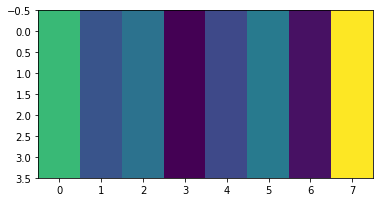

index: 354832
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7447
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-16 04:58:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7447/...
n_bunches                                                     372
bunch_index                                                  1977
bunch_number                                                  370
ts_length                                                   65536
chunk                                                           0
Name: 149, dtype: object


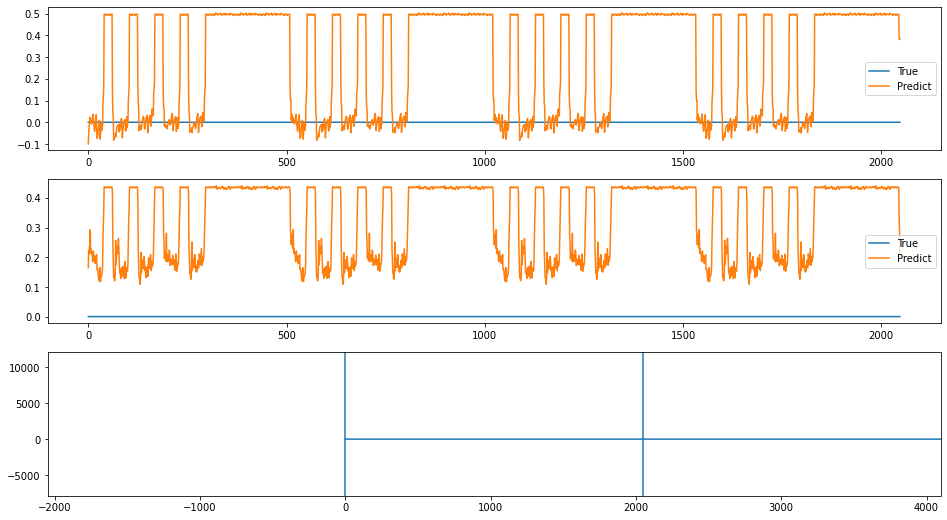

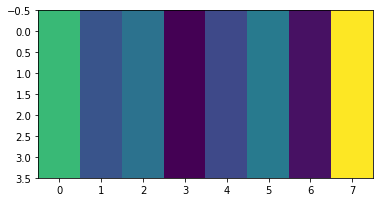

index: 69289
Error: 0.13599773987560754
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   988
bunch_number                                                   93
ts_length                                                   65536
chunk                                                           4
Name: 1052, dtype: object


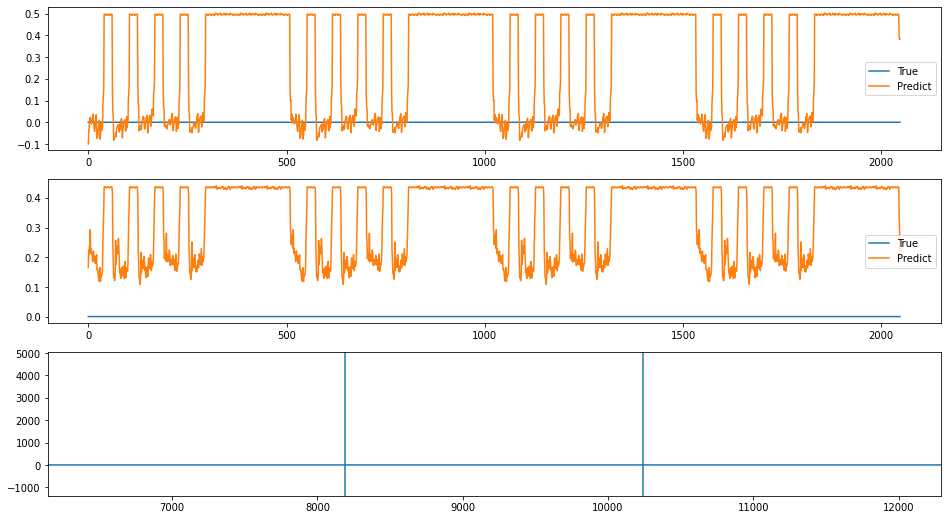

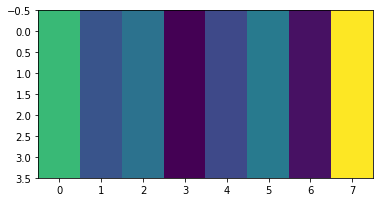

index: 95120
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6970
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-24 09:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6970/...
n_bunches                                                     108
bunch_index                                                   132
bunch_number                                                   76
ts_length                                                   65536
chunk                                                          24
Name: 6307, dtype: object


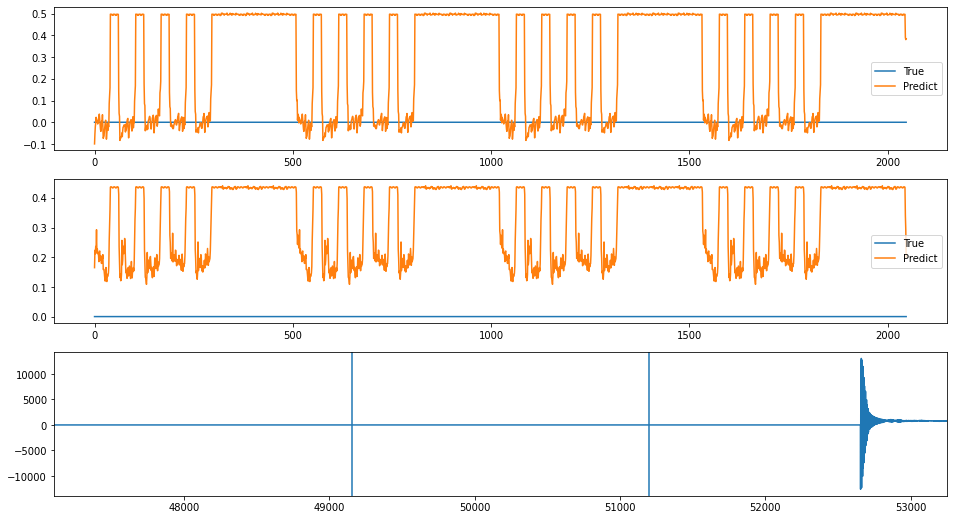

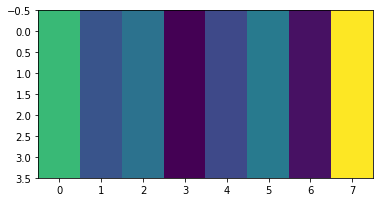

index: 223821
Error: 0.13599773987560754
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:16:08
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     780
bunch_index                                                  1338
bunch_number                                                  722
ts_length                                                   65536
chunk                                                           3
Name: 992, dtype: object


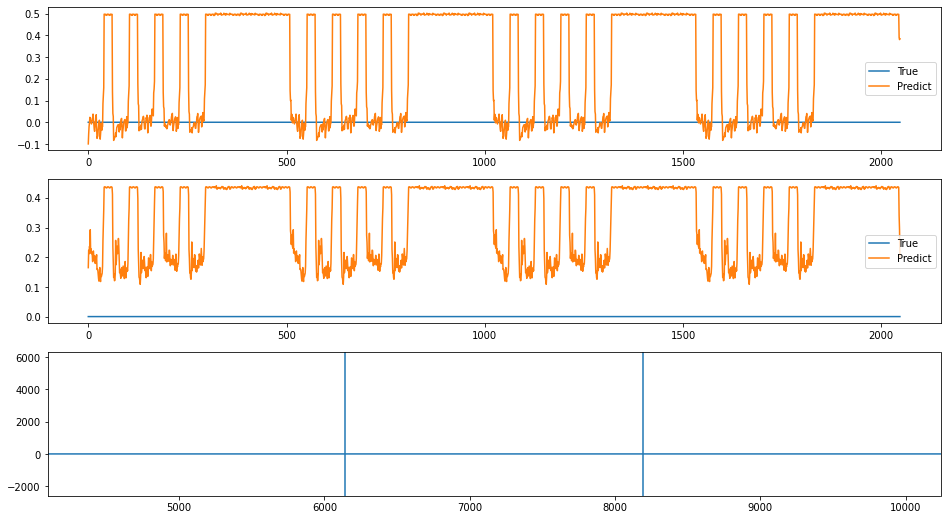

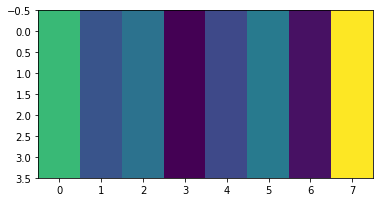

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 6745
Error: 0.035054522166342104
type                                                         Inst
fill                                                         7321
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-20 08:59:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7321/...
n_bunches                                                     408
bunch_index                                                    26
bunch_number                                                    8
ts_length                                                   65536
chunk                                                          14
Name: 3685, dtype: object


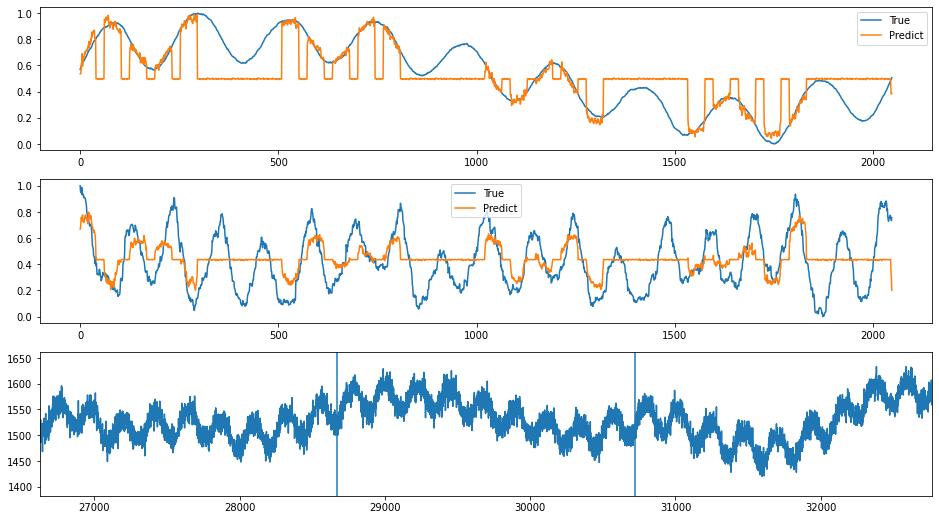

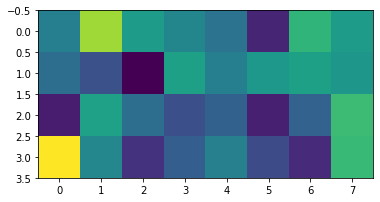

index: 299898
Error: 0.0350544609136368
type                                                         Inst
fill                                                         6940
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-18 05:00:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6940/...
n_bunches                                                    1068
bunch_index                                                  1393
bunch_number                                                 1025
ts_length                                                   65536
chunk                                                          22
Name: 5649, dtype: object


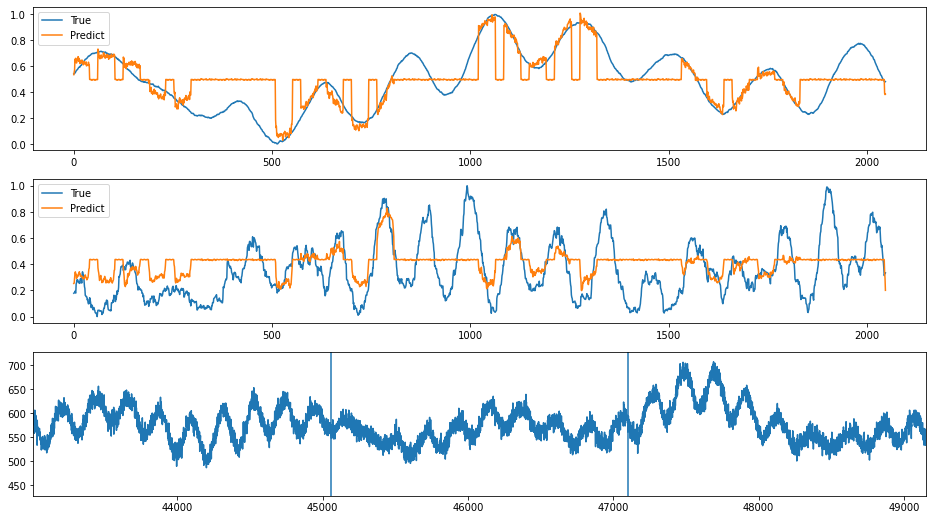

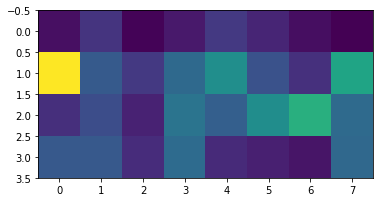

index: 18822
Error: 0.03505457581781829
type                                                         Inst
fill                                                         6239
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-24 09:37:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6239/...
n_bunches                                                    1358
bunch_index                                                   566
bunch_number                                                  248
ts_length                                                   65536
chunk                                                          20
Name: 5161, dtype: object


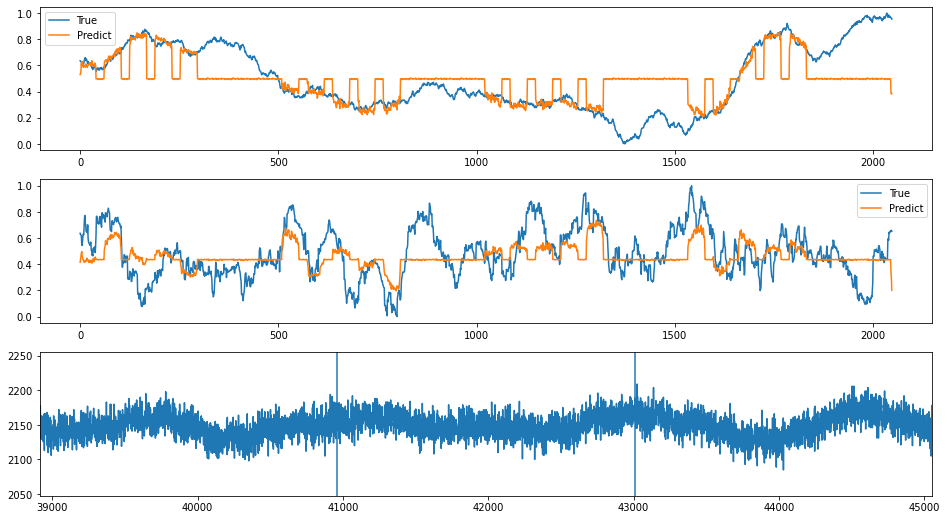

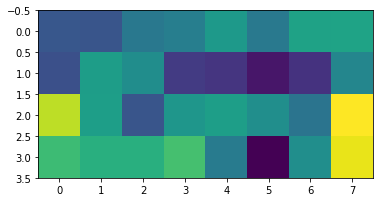

index: 244906
Error: 0.035054593311697274
type                                                         Inst
fill                                                         6685
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 09:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6685/...
n_bunches                                                     228
bunch_index                                                  2210
bunch_number                                                  216
ts_length                                                   65536
chunk                                                          27
Name: 7015, dtype: object


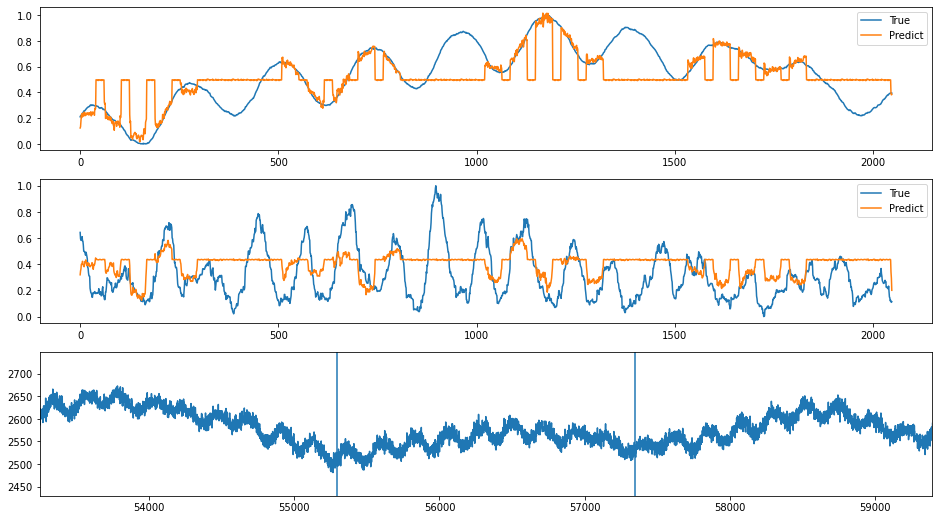

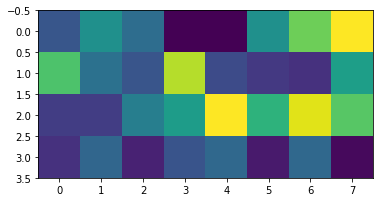

index: 233971
Error: 0.035054412556145144
type                                                         Inst
fill                                                         7485
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-29 23:09:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7485/...
n_bunches                                                     733
bunch_index                                                   127
bunch_number                                                   24
ts_length                                                   65536
chunk                                                          13
Name: 3359, dtype: object


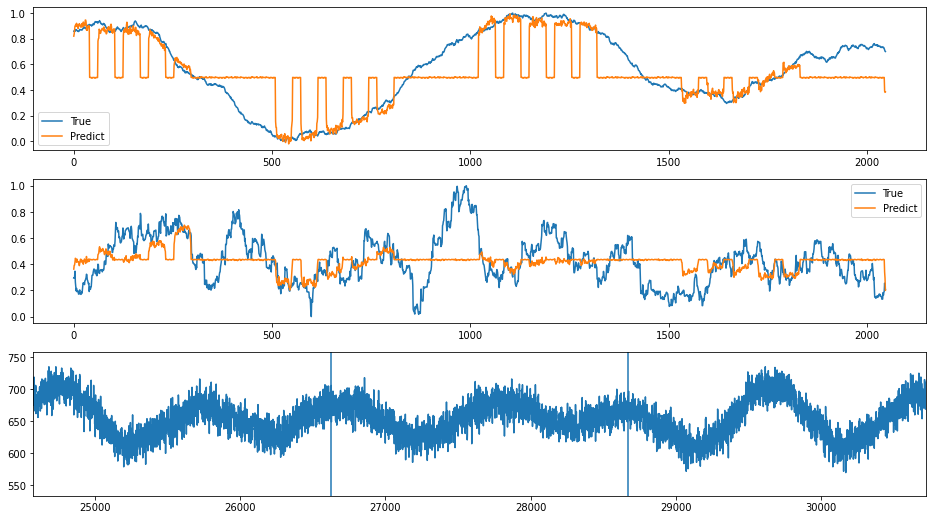

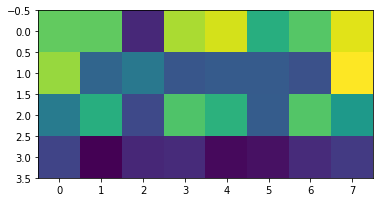

index: 201146
Error: 0.035054399260608604
type                                                         Inst
fill                                                         6602
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 18:37:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6602/...
n_bunches                                                    1956
bunch_index                                                  1834
bunch_number                                                 1489
ts_length                                                   65536
chunk                                                          17
Name: 4368, dtype: object


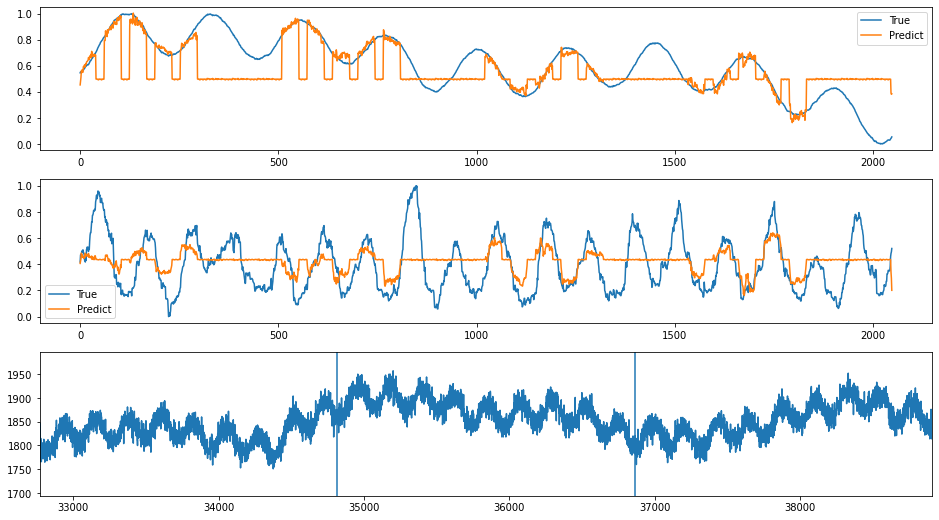

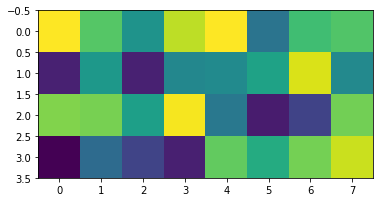

index: 61012
Error: 0.03505439850169405
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 21:05:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                    1292
bunch_index                                                   449
bunch_number                                                  167
ts_length                                                   65536
chunk                                                           0
Name: 132, dtype: object


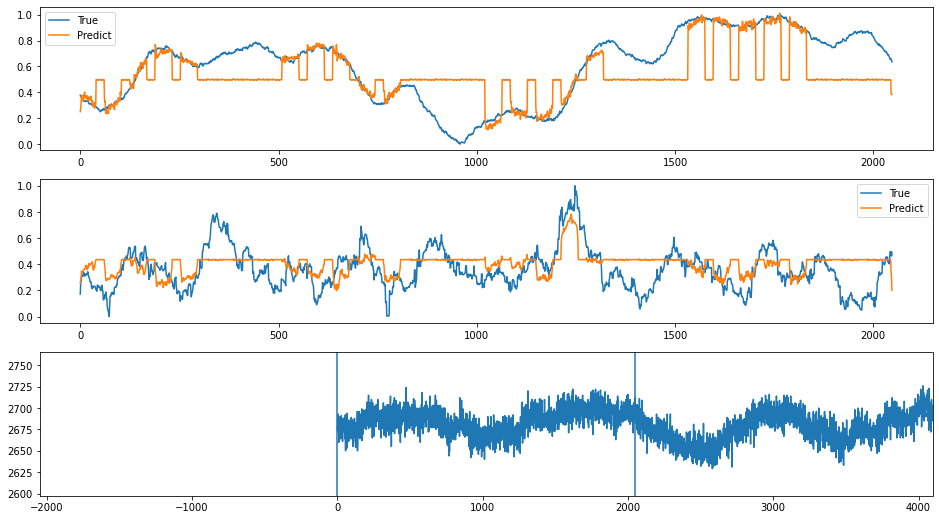

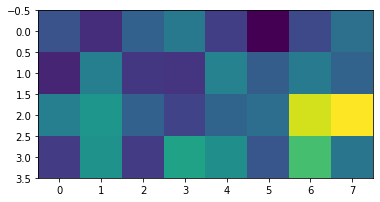

index: 365540
Error: 0.03505462635468368
type                                                         Inst
fill                                                         7462
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-21 21:01:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7462/...
n_bunches                                                      20
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          16
Name: 4134, dtype: object


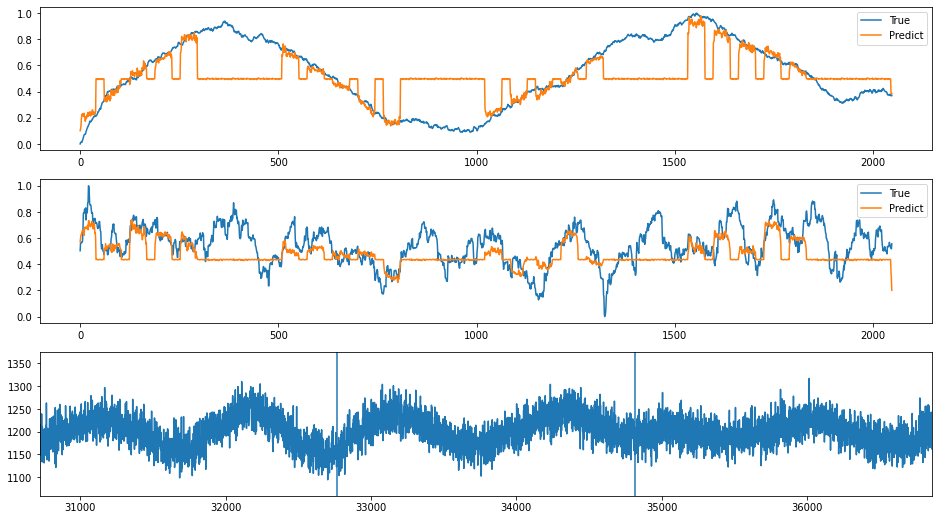

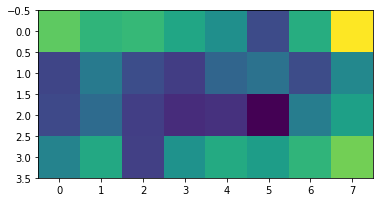

index: 158509
Error: 0.035054391676020424
type                                                         Inst
fill                                                         7480
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 23:02:45
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7480/...
n_bunches                                                     460
bunch_index                                                   315
bunch_number                                                   64
ts_length                                                   65536
chunk                                                          13
Name: 3411, dtype: object


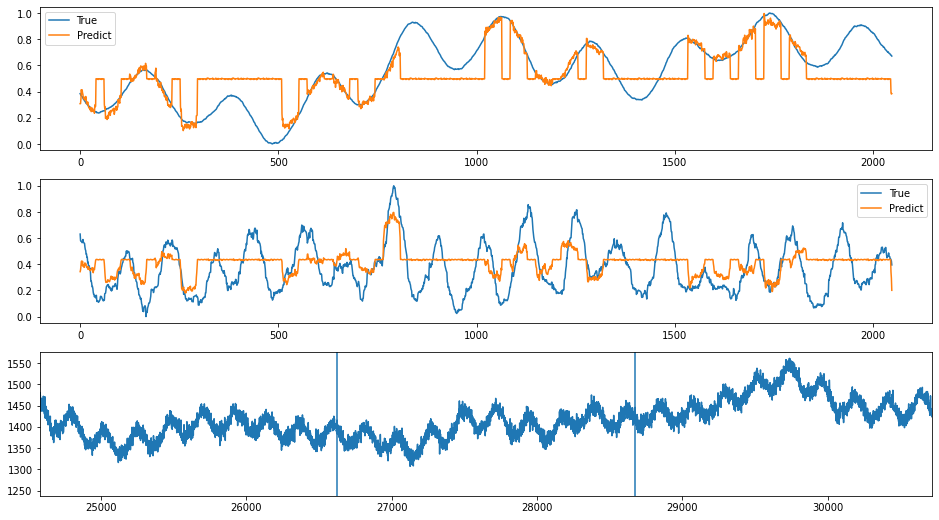

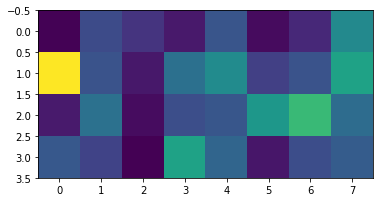

index: 395554
Error: 0.03505465240966639
type                                                         Inst
fill                                                         7137
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 02:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...
n_bunches                                                     924
bunch_index                                                   222
bunch_number                                                  135
ts_length                                                   65536
chunk                                                           4
Name: 1200, dtype: object


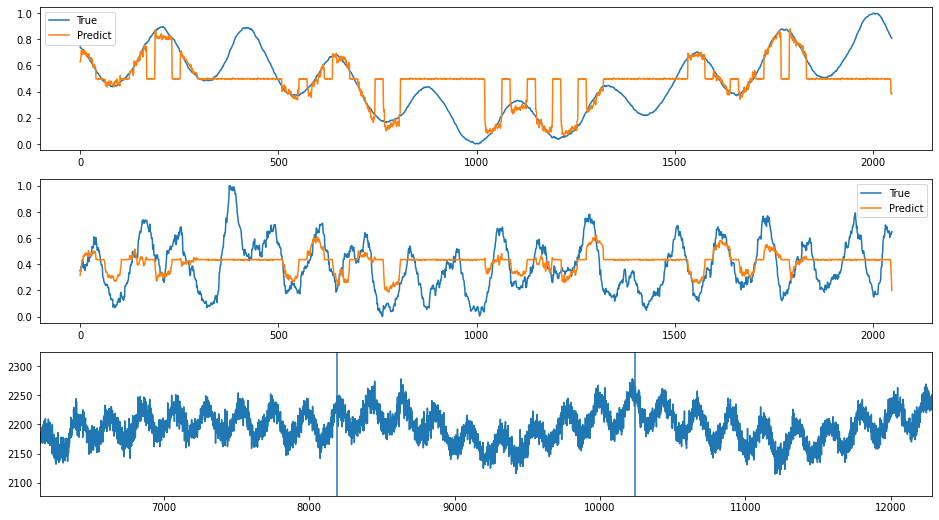

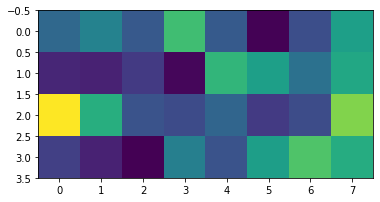

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 32)

In [34]:
print(encoded_2d[0])

[0.9692506  1.8197632  0.7697106  3.041221   2.4737167  1.2257321
 2.915716   0.96460414 3.0102007  4.771923   0.8341957  1.3359357
 2.4764428  3.876731   0.89333826 2.093695   3.6312602  1.8131717
 2.3267462  0.69252443 1.6525404  2.4642837  0.88461226 5.0179086
 3.6312602  1.8131717  2.3267462  0.69252443 1.6525404  2.4642837
 0.88461226 5.0179086 ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

7.8240886

In [37]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

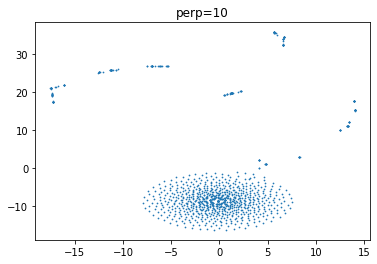

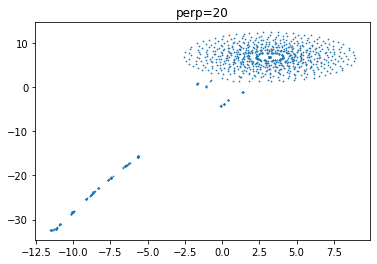

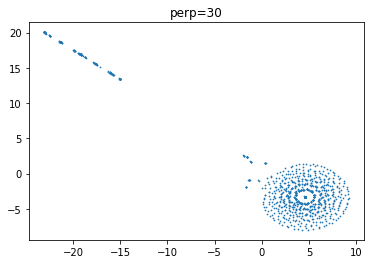

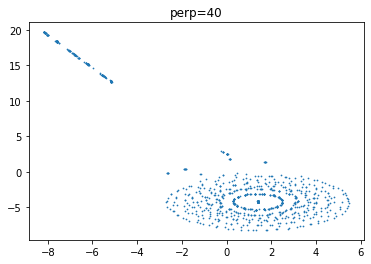

In [39]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

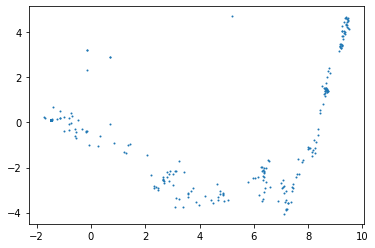

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.91683495

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

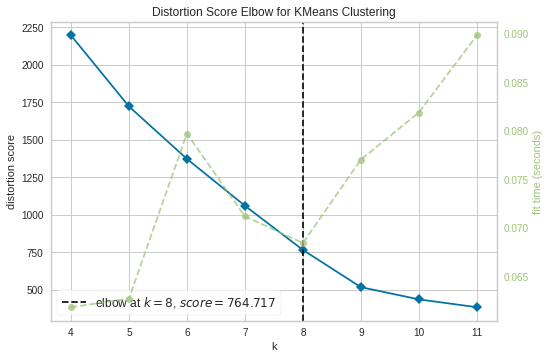

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

In [45]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()